In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("car_prices.csv")

In [5]:
df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [6]:

column_name = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'vin', 'seller']

for col in column_name:
    df[col] = df[col].str.upper()

In [7]:
df.head()

year   make                model        trim   body transmission  \
0  2015    KIA              SORENTO          LX    SUV    AUTOMATIC   
1  2015    KIA              SORENTO          LX    SUV    AUTOMATIC   
2  2014    BMW             3 SERIES  328I SULEV  SEDAN    AUTOMATIC   
3  2015  VOLVO                  S60          T5  SEDAN    AUTOMATIC   
4  2014    BMW  6 SERIES GRAN COUPE        650I  SEDAN    AUTOMATIC   

                 vin state  condition  odometer  color interior  \
0  5XYKTCA69FG566472    CA        5.0   16639.0  WHITE    BLACK   
1  5XYKTCA69FG561319    CA        5.0    9393.0  WHITE    BEIGE   
2  WBA3C1C51EK116351    CA       45.0    1331.0   GRAY    BLACK   
3  YV1612TB4F1310987    CA       41.0   14282.0  WHITE    BLACK   
4  WBA6B2C57ED129731    CA       43.0    2641.0   GRAY    BLACK   

                                   seller      mmr  sellingprice  \
0                 KIA MOTORS AMERICA  INC  20500.0       21500.0   
1                 KIA MOTORS AMERICA  INC  20800.0       21500.0   
2  FINANCIAL SERVICES REMARKETING (LEASE)  31900.0       30000.0   
3                 VOLVO NA REP/WORLD OMNI  27500.0       27750.0   
4  FINANCIAL SERVICES REMARKETING (LEASE)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [9]:
df.describe(include='all')

year    make   model    trim    body transmission        vin  \
count   558837.000000  548536  548438  548186  545642       493485     558833   
unique            NaN      66     851    1888      46            3     550297   
top               NaN    FORD  ALTIMA    BASE   SEDAN    AUTOMATIC  AUTOMATIC   
freq              NaN   93997   19349   55842  241343       475915         22   
mean      2010.038927     NaN     NaN     NaN     NaN          NaN        NaN   
std          3.966864     NaN     NaN     NaN     NaN          NaN        NaN   
min       1982.000000     NaN     NaN     NaN     NaN          NaN        NaN   
25%       2007.000000     NaN     NaN     NaN     NaN          NaN        NaN   
50%       2012.000000     NaN     NaN     NaN     NaN          NaN        NaN   
75%       2013.000000     NaN     NaN     NaN     NaN          NaN        NaN   
max       2015.000000     NaN     NaN     NaN     NaN          NaN        NaN   

         state      condition       odometer   color interior  \
count   558837  547017.000000  558743.000000  558088   558088   
unique      64            NaN            NaN      46       17   
top         FL            NaN            NaN   BLACK    BLACK   
freq     82945            NaN            NaN  110970   244329   
mean       NaN      30.672365   68320.017767     NaN      NaN   
std        NaN      13.402832   53398.542821     NaN      NaN   
min        NaN       1.000000       1.000000     NaN      NaN   
25%        NaN      23.000000   28371.000000     NaN      NaN   
50%        NaN      35.000000   52254.000000     NaN      NaN   
75%        NaN      42.000000   99109.000000     NaN      NaN   
max        NaN      49.000000  999999.000000     NaN      NaN   

                    seller            mmr   sellingprice  \
count               558837  558799.000000  558825.000000   
unique               14263            NaN            NaN   
top     NISSAN-INFINITI LT            NaN            NaN   
freq                 19693            NaN            NaN   
mean                   NaN   13769.377495   13611.358810   
std                    NaN    9679.967174    9749.501628   
min                    NaN      25.000000       1.000000   
25%                    NaN    7100.000000    6900.000000   
50%                    NaN   12250.000000   12100.000000   
75%                    NaN   18300.000000   18200.000000   
max                    NaN  182000.000000  230000.000000   

                                       saledate  
count                                    558825  
unique                                     3766  
top     Tue Feb 10 2015 01:30:00 GMT-0800 (PST)  
freq                                       5334  
mean                                        NaN  
std                                         NaN  
min                                         NaN  
25%                                         NaN  
50%                                         NaN  
75%                                         NaN  
max                                         NaN

In [10]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [11]:
df.groupby('make')['sellingprice'].sum().reset_index().sort_values('sellingprice', ascending=False).head(5)

make  sellingprice
18       FORD  1.362577e+09
9   CHEVROLET  7.233699e+08
48     NISSAN  6.337038e+08
62     TOYOTA  4.890899e+08
5         BMW  4.465095e+08

In [12]:
df_top_5_brand = df[df['make'].isin(['FORD', 'CHEVROLET', 'NISSAN', 'TOYOTA', 'BMW'])]

In [13]:
df_top_5_brand

year       make                model        trim       body  \
2       2014        BMW             3 SERIES  328I SULEV      SEDAN   
4       2014        BMW  6 SERIES GRAN COUPE        650I      SEDAN   
5       2015     NISSAN               ALTIMA       2.5 S      SEDAN   
6       2014        BMW                   M5        BASE      SEDAN   
7       2014  CHEVROLET                CRUZE         1LT      SEDAN   
...      ...        ...                  ...         ...        ...   
558830  2012     NISSAN               SENTRA      2.0 SR      SEDAN   
558831  2011        BMW             5 SERIES        528I      SEDAN   
558834  2012        BMW                   X5   XDRIVE35D        SUV   
558835  2015     NISSAN               ALTIMA       2.5 S      SEDAN   
558836  2014       FORD                F-150         XLT  SUPERCREW   

       transmission                vin state  condition  odometer  color  \
2         AUTOMATIC  WBA3C1C51EK116351    CA       45.0    1331.0   GRAY   
4         AUTOMATIC  WBA6B2C57ED129731    CA       43.0    2641.0   GRAY   
5         AUTOMATIC  1N4AL3AP1FN326013    CA        1.0    5554.0   GRAY   
6         AUTOMATIC  WBSFV9C51ED593089    CA       34.0   14943.0  BLACK   
7         AUTOMATIC  1G1PC5SB2E7128460    CA        2.0   28617.0  BLACK   
...             ...                ...   ...        ...       ...    ...   
558830          NaN  3N1AB6AP3CL622485    TN       26.0   35858.0  WHITE   
558831    AUTOMATIC  WBAFR1C53BC744672    FL       39.0   66403.0  WHITE   
558834    AUTOMATIC  5UXZW0C58CL668465    CA       48.0   50561.0  BLACK   
558835    AUTOMATIC  1N4AL3AP0FC216050    GA       38.0   16658.0  WHITE   
558836    AUTOMATIC  1FTFW1ET2EKE87277    CA       34.0   15008.0   GRAY   

       interior                                             seller      mmr  \
2         BLACK             FINANCIAL SERVICES REMARKETING (LEASE)  31900.0   
4         BLACK             FINANCIAL SERVICES REMARKETING (LEASE)  66000.0   
5         BLACK  ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...  15350.0   
6         BLACK                              THE HERTZ CORPORATION  69000.0   
7         BLACK  ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...  11900.0   
...         ...                                                ...      ...   
558830     GRAY                                 NISSAN-INFINITI LT   9950.0   
558831    BROWN           LAUDERDALE IMPORTS LTD BMW PEMBROK PINES  20300.0   
558834    BLACK             FINANCIAL SERVICES REMARKETING (LEASE)  29800.0   
558835    BLACK  ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...  15100.0   
558836     GRAY                   FORD MOTOR CREDIT COMPANY LLC PD  29600.0   

        sellingprice                                 saledate  
2            30000.0  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
4            67000.0  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  
5            10900.0  Tue Dec 30 2014 12:00:00 GMT-0800 (PST)  
6            65000.0  Wed Dec 17 2014 12:30:00 GMT-0800 (PST)  
7             9800.0  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)  
...              ...                                      ...  
558830       10400.0  Wed Jul 08 2015 17:15:00 GMT-0700 (PDT)  
558831       22800.0  Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)  
558834       34000.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558835       11100.0  Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)  
558836       26700.0  Thu May 28 2015 05:30:00 GMT-0700 (PDT)  

[269360 rows x 16 columns]

In [14]:
df_top_5_brand.isnull().sum()

year                0
make                0
model              86
trim              153
body             1091
transmission    31795
vin                 0
state               0
condition        5060
odometer           50
color             398
interior          398
seller              0
mmr                 1
sellingprice        1
saledate            1
dtype: int64

In [15]:
df_top_5_brand = df_top_5_brand.copy()

df_top_5_brand['vin_prefix'] = df_top_5_brand['vin'].str[:5]

df_top_5_brand.head()

year       make                model        trim   body transmission  \
2  2014        BMW             3 SERIES  328I SULEV  SEDAN    AUTOMATIC   
4  2014        BMW  6 SERIES GRAN COUPE        650I  SEDAN    AUTOMATIC   
5  2015     NISSAN               ALTIMA       2.5 S  SEDAN    AUTOMATIC   
6  2014        BMW                   M5        BASE  SEDAN    AUTOMATIC   
7  2014  CHEVROLET                CRUZE         1LT  SEDAN    AUTOMATIC   

                 vin state  condition  odometer  color interior  \
2  WBA3C1C51EK116351    CA       45.0    1331.0   GRAY    BLACK   
4  WBA6B2C57ED129731    CA       43.0    2641.0   GRAY    BLACK   
5  1N4AL3AP1FN326013    CA        1.0    5554.0   GRAY    BLACK   
6  WBSFV9C51ED593089    CA       34.0   14943.0  BLACK    BLACK   
7  1G1PC5SB2E7128460    CA        2.0   28617.0  BLACK    BLACK   

                                              seller      mmr  sellingprice  \
2             FINANCIAL SERVICES REMARKETING (LEASE)  31900.0       30000.0   
4             FINANCIAL SERVICES REMARKETING (LEASE)  66000.0       67000.0   
5  ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...  15350.0       10900.0   
6                              THE HERTZ CORPORATION  69000.0       65000.0   
7  ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...  11900.0        9800.0   

                                  saledate vin_prefix  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)      WBA3C  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)      WBA6B  
5  Tue Dec 30 2014 12:00:00 GMT-0800 (PST)      1N4AL  
6  Wed Dec 17 2014 12:30:00 GMT-0800 (PST)      WBSFV  
7  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)      1G1PC

In [16]:
# Check the VIN based on the make and model
make_vin = df_top_5_brand[['make', 'vin']]

make_vin = df_top_5_brand.groupby(['make', 'model'])['vin'].apply(lambda x: ', '.join(str(v)[:5] for v in x)).reset_index()

make_vin_exploded = make_vin.assign(vin_prefix=make_vin['vin'].str.split(', ')).explode('vin_prefix')

make_vin_exploded

make     model                                                vin  \
0       BMW         1                                              WBSUR   
1       BMW  1 SERIES  WBAUC, WBAUN, WBAUP, WBAUN, WBAUN, WBAUN, WBAU...   
1       BMW  1 SERIES  WBAUC, WBAUN, WBAUP, WBAUN, WBAUN, WBAUN, WBAU...   
1       BMW  1 SERIES  WBAUC, WBAUN, WBAUP, WBAUN, WBAUN, WBAUN, WBAU...   
1       BMW  1 SERIES  WBAUC, WBAUN, WBAUP, WBAUN, WBAUN, WBAUN, WBAU...   
..      ...       ...                                                ...   
240  TOYOTA     YARIS  JTDKT, JTDKT, JTDKT, JTDBT, JTDJT, JTDBT, JTDK...   
240  TOYOTA     YARIS  JTDKT, JTDKT, JTDKT, JTDBT, JTDJT, JTDBT, JTDK...   
240  TOYOTA     YARIS  JTDKT, JTDKT, JTDKT, JTDBT, JTDJT, JTDBT, JTDK...   
240  TOYOTA     YARIS  JTDKT, JTDKT, JTDKT, JTDBT, JTDJT, JTDBT, JTDK...   
240  TOYOTA     YARIS  JTDKT, JTDKT, JTDKT, JTDBT, JTDJT, JTDBT, JTDK...   

    vin_prefix  
0        WBSUR  
1        WBAUC  
1        WBAUN  
1        WBAUP  
1        WBAUN  
..         ...  
240      JTDBT  
240      JTDKT  
240      JTDJT  
240      JTDKT  
240      JTDBT  

[269274 rows x 4 columns]

In [17]:
# Create a dictionary mapping from vin_5 to make and model
make_vin_dict = {}

for _, row in make_vin.iterrows():
    vin_prefixes = row['vin'].split(', ')  # Split VIN into a list
    for prefix in vin_prefixes:
        make_vin_dict[prefix] = (row['make'], row['model'])


# Use the mapping dictionary to fill in the make and model
df_top_5_brand[['make', 'model']] = df_top_5_brand['vin_prefix'].map(make_vin_dict).apply(pd.Series)

In [18]:
df_top_5_brand.isnull().sum()

year                0
make                0
model               0
trim              153
body             1091
transmission    31795
vin                 0
state               0
condition        5060
odometer           50
color             398
interior          398
seller              0
mmr                 1
sellingprice        1
saledate            1
vin_prefix          0
dtype: int64

In [19]:
column_change = ['transmission',
                 'trim',
                 'body',
                 'condition',
                 'odometer',
                 'color',
                 'interior',
                 'mmr',
                 'sellingprice',
                 'saledate']

def fill_missing_values_1(df, make_col, model_col, target_cols):
    '''This function is used to replace missing values based on two columns: make and model'''
    
    for target_col in target_cols:
        # Calculate the mode for each combination of make and model
        mode_values = df.groupby([make_col, model_col])[target_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        
        # Loop to fill in the missing values
        for (make_value, model_value), mode_value in mode_values.items():
            if pd.notna(mode_value):  # Ensure the mode exists
                df.loc[
                    (df[make_col] == make_value) & 
                    (df[model_col] == model_value) & 
                    df[target_col].isna(), 
                    target_col
                ] = mode_value
    
    return df

In [20]:
df_top_5_brand = fill_missing_values_1(df_top_5_brand, 'make', 'model', column_change)

In [21]:
df_top_5_brand.isnull().sum()

year              0
make              0
model             0
trim              1
body            141
transmission      6
vin               0
state             0
condition         2
odometer          0
color             0
interior          0
seller            0
mmr               0
sellingprice      0
saledate          0
vin_prefix        0
dtype: int64

In [22]:
df_top_5_brand[df_top_5_brand['body'].isnull()].sort_values('sellingprice', ascending=False)

year       make   model                 trim body transmission  \
54061   2011        BMW       1             SERIES M  NaN       MANUAL   
11773   2010  CHEVROLET   G3500              CUTAWAY  NaN    AUTOMATIC   
89380   2011       FORD    E350         WAGON V8 XLT  NaN    AUTOMATIC   
90199   2010       FORD    E350       CLUB WAGON XLT  NaN    AUTOMATIC   
63886   2011       FORD    E350         WAGON V8 XLT  NaN    AUTOMATIC   
...      ...        ...     ...                  ...  ...          ...   
102057  1995       FORD    E350                 BASE  NaN    AUTOMATIC   
28621   2000       FORD    E150  CARGO V8 RECREATION  NaN    AUTOMATIC   
30267   1991     TOYOTA  PREVIA                   LE  NaN    AUTOMATIC   
131536  1994     TOYOTA  PREVIA                   LE  NaN    AUTOMATIC   
49470   1991     TOYOTA  PREVIA                   LE  NaN    AUTOMATIC   

                      vin state  condition  odometer  color interior  \
54061   WBSUR9C52BVT47623    WI       44.0   19205.0  WHITE    BLACK   
11773   1GB6G4AG0A1108191    GA        4.0   44635.0  WHITE     GRAY   
89380   1FDSS3BL6BDA64823    CA       35.0   55670.0  WHITE     GRAY   
90199   1FDSS3BL9ADA14545    CA       37.0   13837.0  WHITE     GRAY   
63886   1FDSS3BL8BDA64872    CA       48.0   65702.0  WHITE     GRAY   
...                   ...   ...        ...       ...    ...      ...   
102057  1FBJS31H8SHC19530    IL        1.0  291305.0  BLACK    BEIGE   
28621   1FDRE14W7YHA47693    FL        2.0  152684.0    RED    BEIGE   
30267   JT3AC12R9M0046854    VA        2.0  226008.0   BLUE     BLUE   
131536  JT3AC12R2R1127552    MD        2.0  293496.0  WHITE     GRAY   
49470   JT3AC12R3M0045974    MD        2.0  274149.0  WHITE     BLUE   

                                   seller      mmr  sellingprice  \
54061            ENTERPRISE MOTORCARS INC  52400.0       54400.0   
11773       ATLANTA AUTO DISTRIBUTORS LLC   9600.0       16700.0   
89380                           VPSI  INC  15300.0       16300.0   
90199                           VPSI  INC  15250.0       16200.0   
63886                           VPSI  INC  14800.0       16000.0   
...                                   ...      ...           ...   
102057        WESTLAKE FINANCIAL SERVICES    450.0         500.0   
28621                  NORTH PALM HYUNDAI   2425.0         400.0   
30267                        PURPLE HEART    775.0         350.0   
131536          PURPLE HEART SERVICES INC    175.0         300.0   
49470   MANHEIM BALTWASH/JUNK A CAR SCRAP    600.0         275.0   

                                       saledate vin_prefix  
54061   Wed Jan 14 2015 02:00:00 GMT-0800 (PST)      WBSUR  
11773   Thu Dec 18 2014 10:00:00 GMT-0800 (PST)      1GB6G  
89380   Wed Jan 14 2015 04:30:00 GMT-0800 (PST)      1FDSS  
90199   Wed Jan 07 2015 12:30:00 GMT-0800 (PST)      1FDSS  
63886   Wed Dec 31 2014 12:30:00 GMT-0800 (PST)      1FDSS  
...                                         ...        ...  
102057  Tue Jan 13 2015 10:00:00 GMT-0800 (PST)      1FBJS  
28621   Thu Dec 18 2014 10:15:00 GMT-0800 (PST)      1FDRE  
30267   Thu Dec 18 2014 11:50:00 GMT-0800 (PST)      JT3AC  
131536  Tue Jan 13 2015 12:00:00 GMT-0800 (PST)      JT3AC  
49470   Tue Dec 23 2014 11:00:00 GMT-0800 (PST)      JT3AC  

[141 rows x 17 columns]

In [23]:
column_change_2 = ['trim', 'body', 'condition', 'transmission']

def fill_missing_values_2(df, make_col, target_cols):
    '''This function is to replace missing values based on only one column, which is the 'make' column'''
    
    for target_col in target_cols:
        # Calculate the mode for each make
        mode_values = df.groupby(make_col)[target_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        
        # Loop to fill in the missing values
        for make_value, mode_value in mode_values.items():
            if pd.notna(mode_value):  # Make sure the mode exists
                df.loc[
                    (df[make_col] == make_value) & 
                    df[target_col].isna(), 
                    target_col
                ] = mode_value
    return df

In [24]:
df_top_5_brand = fill_missing_values_2(df_top_5_brand, 'make', column_change_2)

In [25]:
def replace_dash_with_mode(df, columns):

    '''This function is to replace symbols like '-', 'unknown', etc. with the mode value'''

    for column in columns:
        if column in df.columns:
            mode_value = df.loc[~df[column].astype(str).str.strip().isin(["—", "— ", " —", "—", "-", "unknown", "n/a"]), column].mode()
            
            if not mode_value.empty:
                df[column] = df[column].replace(["—", "— ", " —", "-", "unknown", "n/a"], mode_value[0])
    
    return df

In [26]:
column_top_5_brand = df_top_5_brand.columns.tolist()
column_top_5_brand

['year',
 'make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'condition',
 'odometer',
 'color',
 'interior',
 'seller',
 'mmr',
 'sellingprice',
 'saledate',
 'vin_prefix']

In [27]:
df_top_5_brand = replace_dash_with_mode(df_top_5_brand, column_top_5_brand)

In [28]:
df_top_5_brand['saledate'] = pd.to_datetime(df_top_5_brand['saledate'], utc=True)

In [29]:
df_top_5_brand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269360 entries, 2 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          269360 non-null  int64              
 1   make          269360 non-null  object             
 2   model         269360 non-null  object             
 3   trim          269360 non-null  object             
 4   body          269360 non-null  object             
 5   transmission  269360 non-null  object             
 6   vin           269360 non-null  object             
 7   state         269360 non-null  object             
 8   condition     269360 non-null  float64            
 9   odometer      269360 non-null  float64            
 10  color         269360 non-null  object             
 11  interior      269360 non-null  object             
 12  seller        269360 non-null  object             
 13  mmr           269360 non-null  float64      

In [30]:
df_top_5_brand['Day Sale'] = df_top_5_brand['saledate'].dt.day
df_top_5_brand['Month Sale'] = df_top_5_brand['saledate'].dt.month
df_top_5_brand['Year Sale'] = df_top_5_brand['saledate'].dt.year

In [31]:
df_top_5_brand['Year Sale'].unique()

array([2015, 2014], dtype=int64)

In [32]:
df_top_5_brand = df_top_5_brand.rename(columns={'year' : 'Year of Manufacture'})

In [33]:
def time_required_to_sell(df):
     df['Years to Sale'] = df['Year Sale'] - df['Year of Manufacture'] 

     return df

In [34]:
df_top_5_brand = time_required_to_sell(df_top_5_brand)

In [35]:
total_sales_brand = df_top_5_brand.groupby('make')['sellingprice'].sum().reset_index()
avg_sales_brand = df_top_5_brand.groupby('make')['sellingprice'].mean().reset_index()

In [36]:
def sort_descending(df, column):

    '''This function is to sort the data from largest to smallest'''
    
    return df.sort_values(column, ascending=False)


In [37]:
total_sales_brand = sort_descending(total_sales_brand, 'sellingprice')
avg_sales_brand = sort_descending(avg_sales_brand, 'sellingprice')

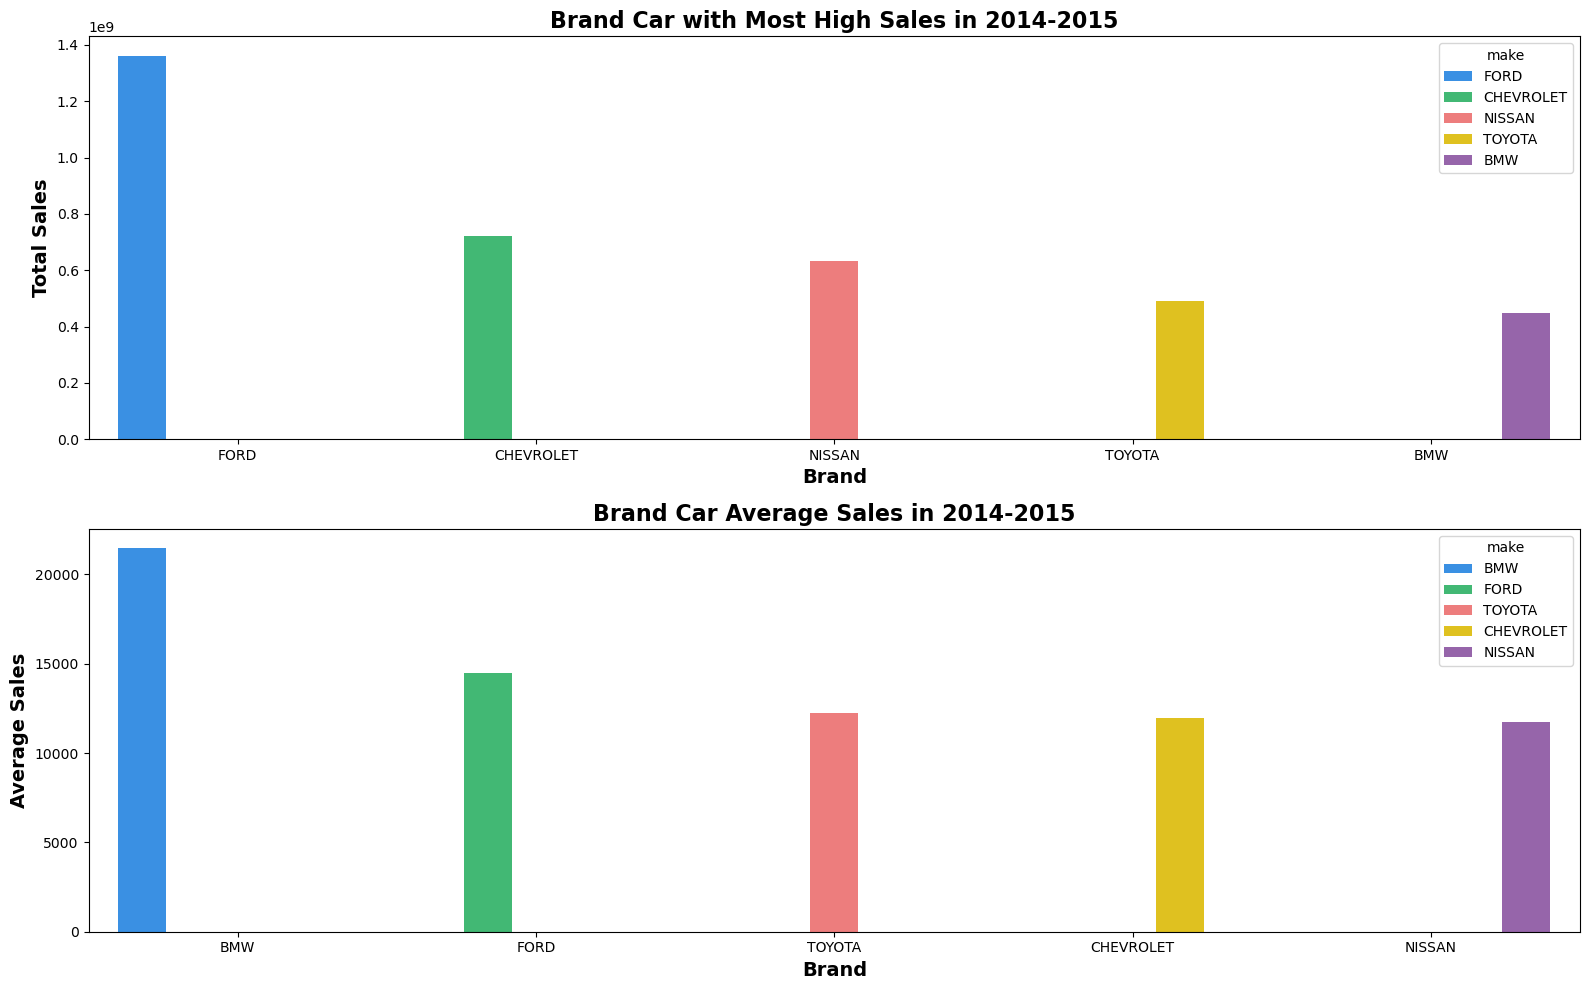

In [38]:
colors = ['#1E90FF', '#2ECC71', '#FF6B6B', '#FFD700', '#9B59B6']
plt.figure(figsize=(16,10))

# Top plot – Total Sales
plt.subplot(2,1,1)
sns.barplot(data = total_sales_brand,
            x = 'make',
            y = 'sellingprice',
            hue = 'make',
            palette = colors)

plt.title('Brand Car with Most High Sales in 2014-2015', fontsize = 16, fontweight = 'bold')
plt.xlabel('Brand', fontsize = 14, fontweight = 'bold')
plt.ylabel('Total Sales', fontsize = 14, fontweight = 'bold')

# Bottom plot – Average Sales
plt.subplot(2,1,2)
sns.barplot(data = avg_sales_brand,
            x = 'make',
            y = 'sellingprice',
            hue = 'make',
            palette = colors)

plt.title('Brand Car Average Sales in 2014-2015', fontsize = 16, fontweight = 'bold')
plt.xlabel('Brand', fontsize = 14, fontweight = 'bold')
plt.ylabel('Average Sales', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [39]:
!pip install wordcloud

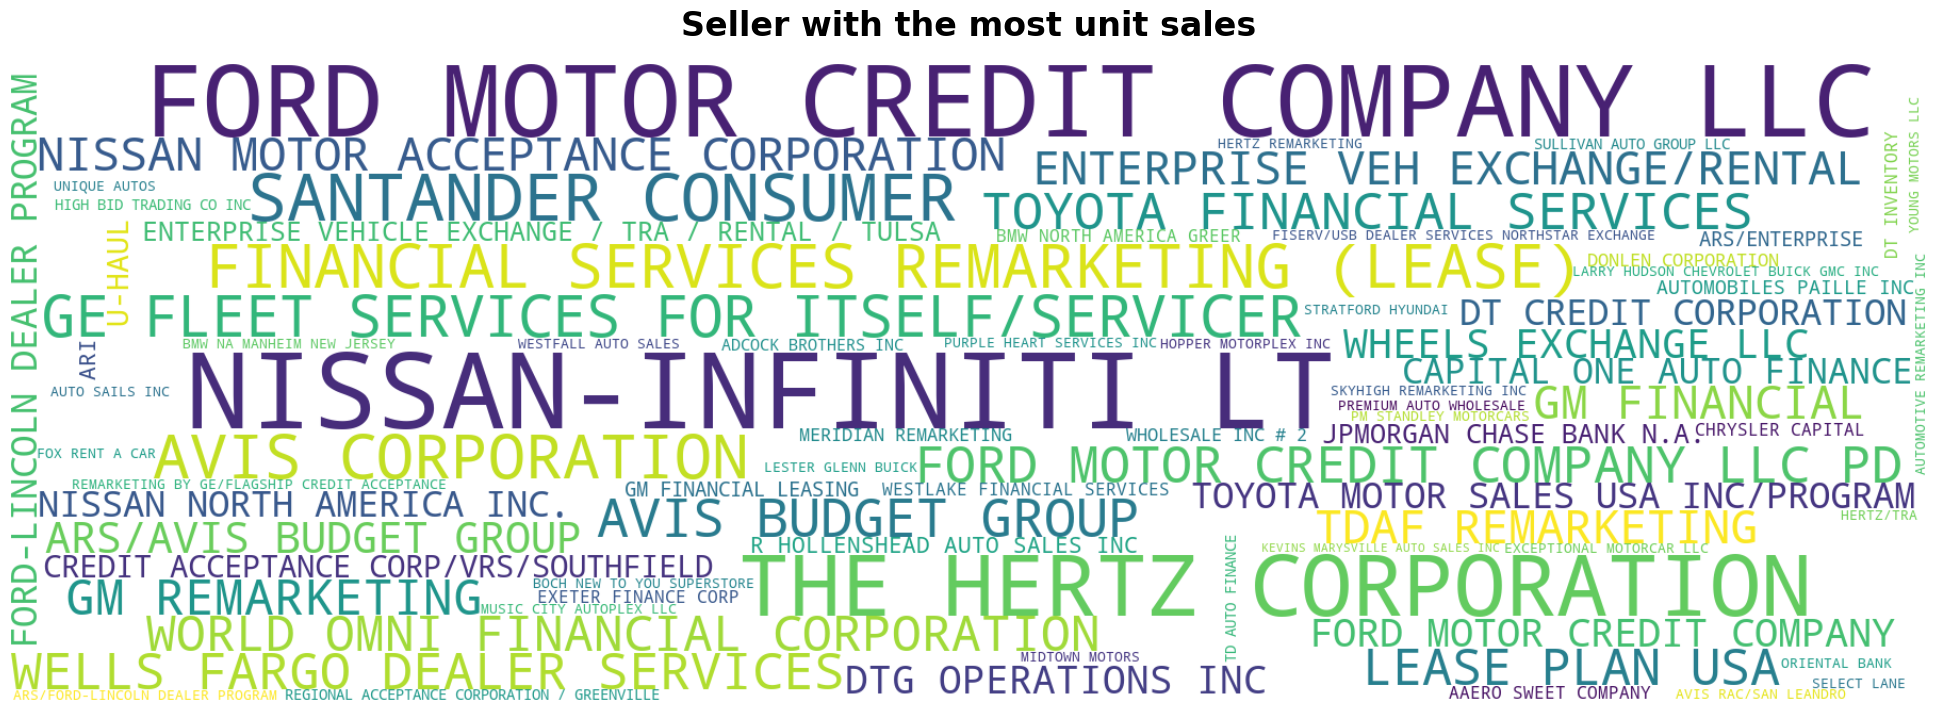

In [40]:
from wordcloud import WordCloud

seller = df_top_5_brand['seller'].value_counts()

seller_wc = WordCloud(
    width=1800, 
    height=600, 
    background_color='white', 
    colormap='viridis',  
    max_font_size=100, 
    min_font_size=10, 
    prefer_horizontal=0.9  
).generate_from_frequencies(seller)

plt.figure(figsize=(20,12))
plt.imshow(seller_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Seller with the most unit sales', 
          fontsize=24, 
          fontweight='bold', 
          pad=20,  
          loc='center') 
plt.tight_layout(pad=3.0)

In [41]:
df_sales = df_top_5_brand.groupby('seller')['sellingprice'].sum().reset_index(name='Total Sales')
df_sales = df_sales.sort_values('Total Sales', ascending = False).head()

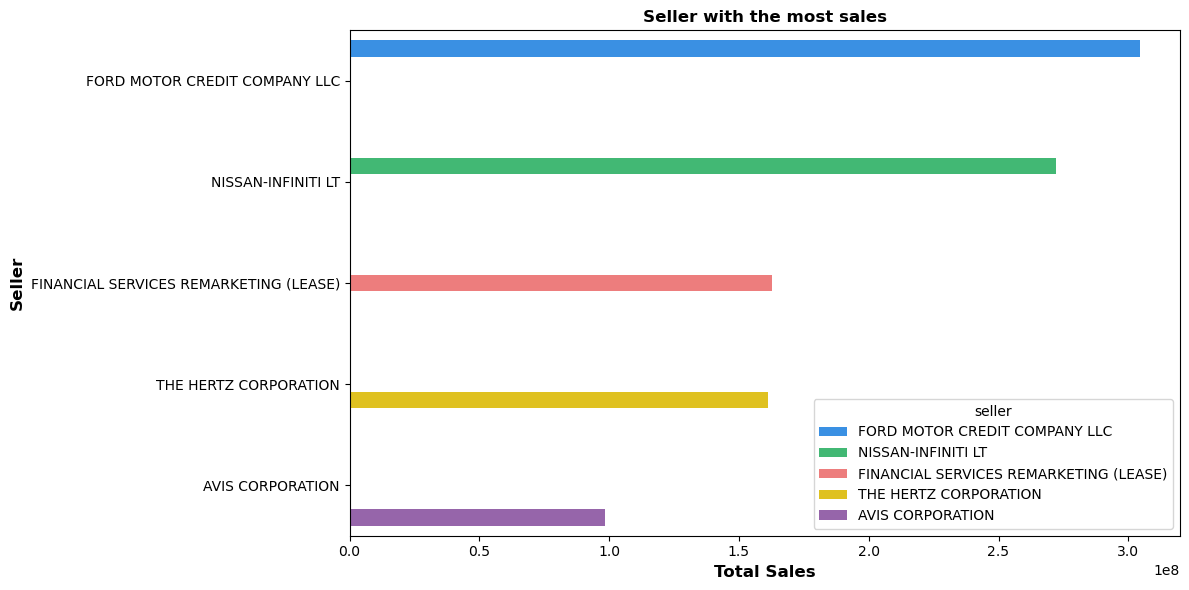

In [42]:
order = df_sales.sort_values('Total Sales', ascending=False)['seller'].unique()

plt.figure(figsize=(12,6))

sns.barplot(data = df_sales,
            x = 'Total Sales',
            y = 'seller',
            order = order,
            hue = 'seller',
            palette= colors)

plt.title('Seller with the most sales', fontsize=12, fontweight='bold')
plt.xlabel('Total Sales', fontsize=12, fontweight='bold')
plt.ylabel('Seller', fontsize=12, fontweight='bold')

plt.tight_layout()

In [43]:
states_sales = df_top_5_brand.groupby('state')['sellingprice'].sum().reset_index()


fig = px.choropleth(
    states_sales,
    locations= 'state',
    locationmode= 'USA-states',
    color= 'sellingprice',
    scope = 'usa',
    color_continuous_scale= 'Blues',
    title = 'States with Highest Sales',
    labels= 'sellingprice',
    width= 1200,
    height= 600
)

fig.update_layout(geo_scope = 'usa')

fig.show()

In [44]:
# Descriptive statistical analysis by brand
def statistic_descriptive(df):
    table = df.groupby('make').agg({
        'sellingprice': ['count', 'mean', 'sum', 'median', 'min', 'max', 'std'],
        'odometer': ['mean', 'median']
    }).round(2)
    
    table.columns = [
        'count_car', 
        'average_sales', 
        'total_sales',
        'median_sales', 
        'min_sales', 
        'max_sales', 
        'std_deviation_sales',
        'average_odometer', 
        'median_odometer'
    ]
    
    return table

In [45]:
descriptive_table = statistic_descriptive(df_top_5_brand)

descriptive_table

count_car  average_sales   total_sales  median_sales  min_sales  \
make                                                                         
BMW            20793       21474.03  4.465095e+08       20100.0      100.0   
CHEVROLET      60587       11939.36  7.233699e+08       10500.0      100.0   
FORD           93997       14496.06  1.362587e+09       13500.0        1.0   
NISSAN         54017       11731.56  6.337038e+08       12000.0      100.0   
TOYOTA         39966       12237.65  4.890899e+08       12100.0      150.0   

           max_sales  std_deviation_sales  average_odometer  median_odometer  
make                                                                          
BMW         165000.0             14680.90          64278.13          51449.0  
CHEVROLET    88250.0              8895.94          77133.08          63041.0  
FORD        230000.0              8617.59          63859.16          45826.0  
NISSAN       86400.0              5738.85          56312.81          40575.0  
TOYOTA       68900.0              7004.29          74126.20          54300.5

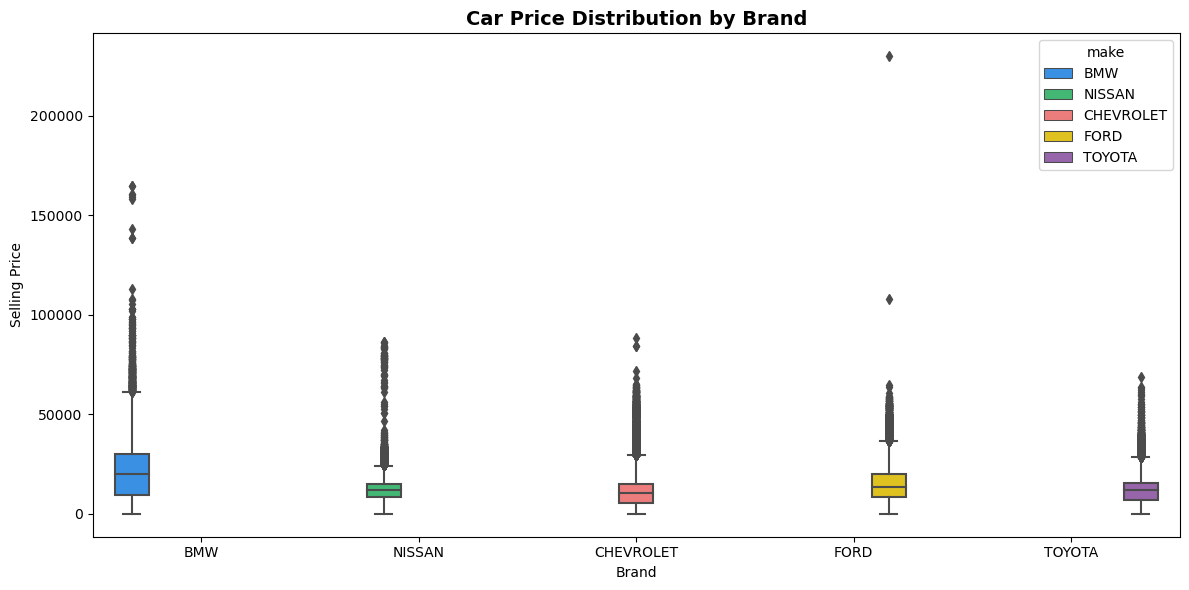

In [46]:
plt.figure(figsize=(12, 6))

sns.boxplot(data = df_top_5_brand,
             x='make', 
             y='sellingprice',
             palette = colors,
             hue = 'make')

plt.title('Car Price Distribution by Brand', fontsize = 14, fontweight = 'bold')
plt.xlabel('Brand')
plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

In [47]:
brand_name = df_top_5_brand['make'].unique().tolist()

def create_brand_tables(df, brands):
    
    '''Create a global variable for each brand'''

    for brand in brands:
        globals()[f'df_{brand.lower()}'] = df[df['make'] == brand]

In [48]:
create_brand_tables(df_top_5_brand, brand_name)

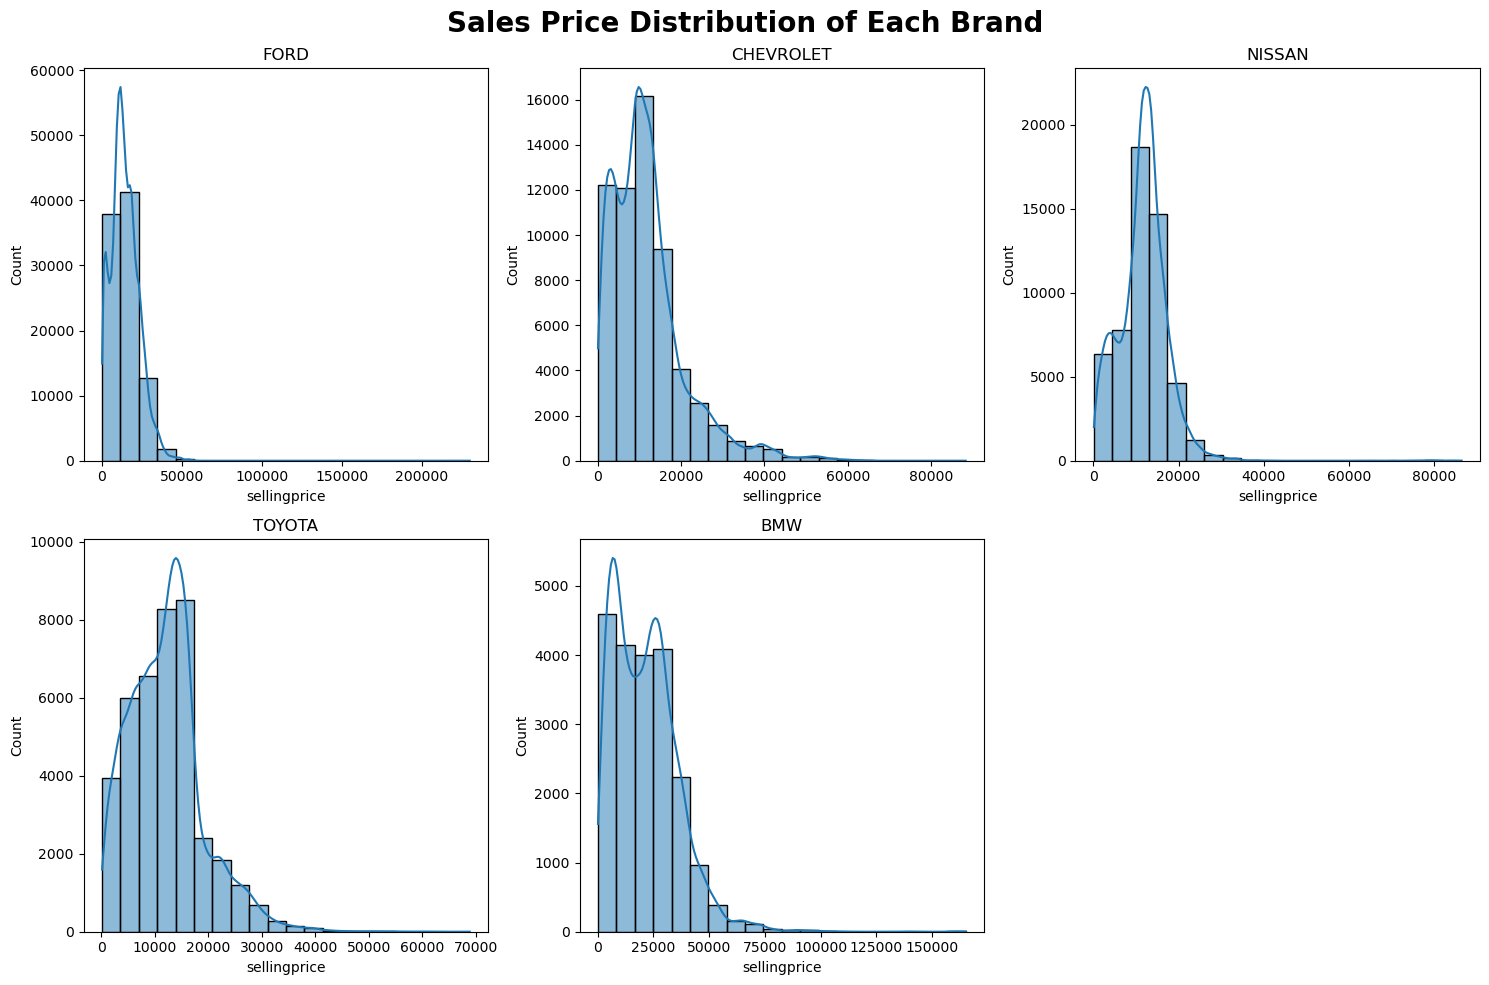

In [49]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.histplot(data=df_ford, x='sellingprice', bins=20, kde=True)
plt.title('FORD')

plt.subplot(2,3,2)
sns.histplot(data=df_chevrolet, x='sellingprice', bins=20, kde=True)
plt.title('CHEVROLET')

plt.subplot(2,3,3)
sns.histplot(data=df_nissan, x='sellingprice', bins=20, kde=True)
plt.title('NISSAN')

plt.subplot(2,3,4)
sns.histplot(data=df_toyota, x='sellingprice', bins=20, kde=True)
plt.title('TOYOTA')

plt.subplot(2,3,5)
sns.histplot(data=df_bmw, x='sellingprice', bins=20, kde=True)
plt.title('BMW')

plt.suptitle('Sales Price Distribution of Each Brand', fontsize = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

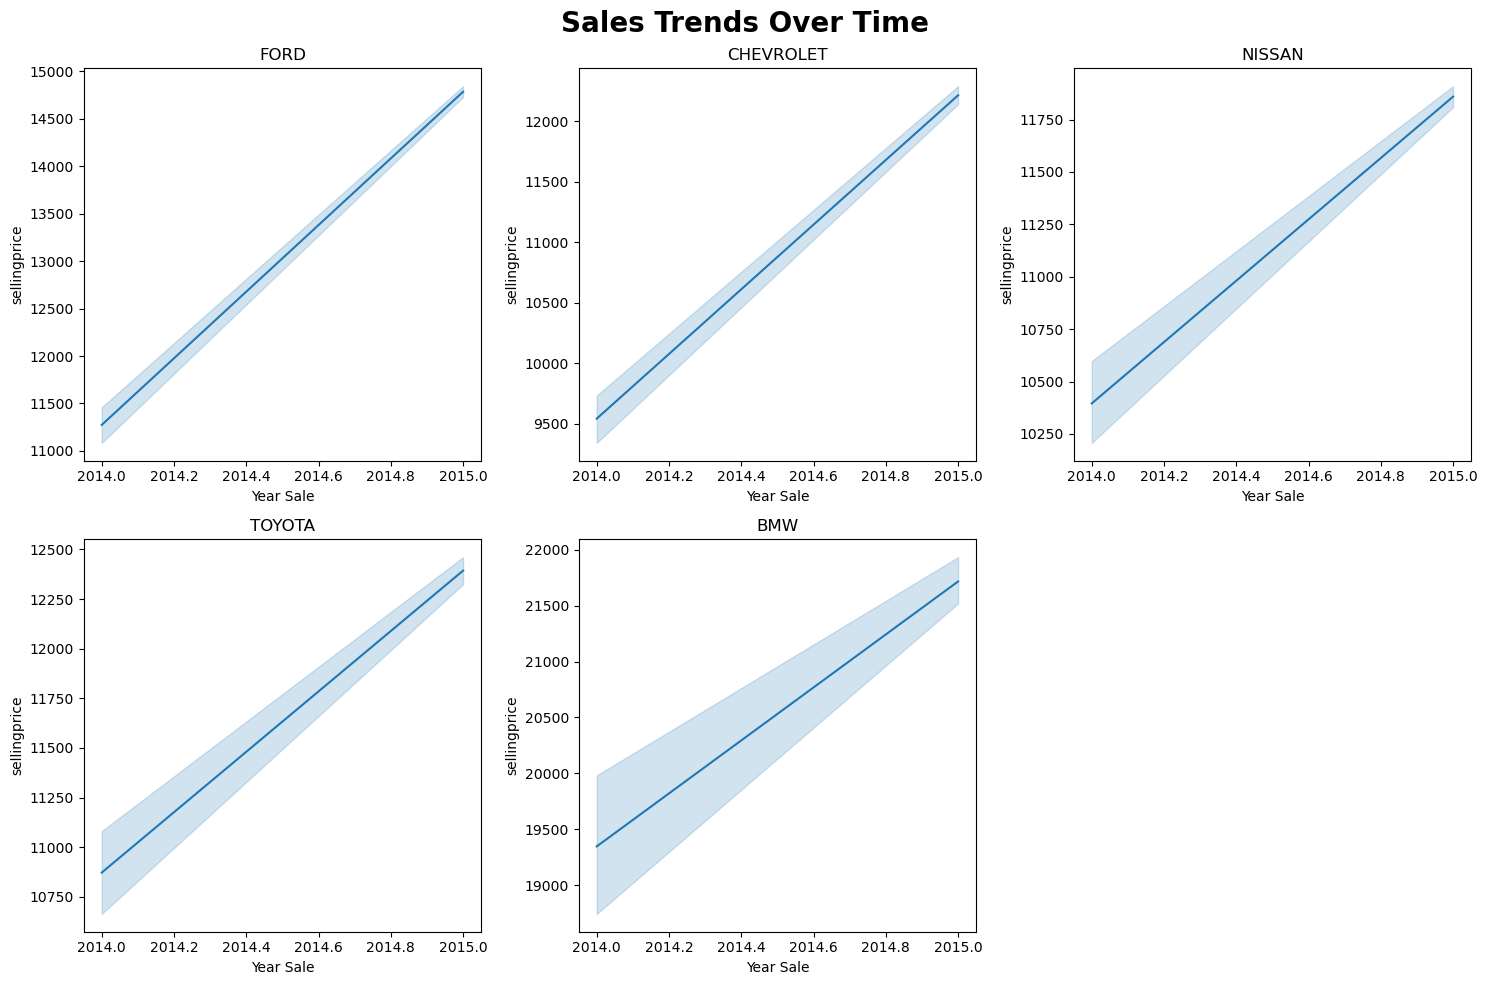

In [50]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.lineplot(data = df_ford, x = 'Year Sale', y='sellingprice')
plt.title('FORD')

plt.subplot(2,3,2)
sns.lineplot(data = df_chevrolet, x = 'Year Sale', y='sellingprice')
plt.title('CHEVROLET')

plt.subplot(2,3,3)
sns.lineplot(data = df_nissan, x = 'Year Sale', y='sellingprice')
plt.title('NISSAN')

plt.subplot(2,3,4)
sns.lineplot(data =df_toyota, x = 'Year Sale', y='sellingprice')
plt.title('TOYOTA')

plt.subplot(2,3,5)
sns.lineplot(data=df_bmw, x = 'Year Sale',y='sellingprice')
plt.title('BMW')

plt.suptitle('Sales Trends Over Time',fontsize = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

In [51]:
def correlation_map(df):
    table = df[['sellingprice', 'odometer', 'Year of Manufacture', 'condition']]
    correlation = table.corr()

    return correlation

ford_corr = correlation_map(df_ford)
bmw_corr = correlation_map(df_bmw)
nissan_corr = correlation_map(df_nissan)
chevrolet_corr = correlation_map(df_chevrolet)
toyota_corr = correlation_map(df_toyota)

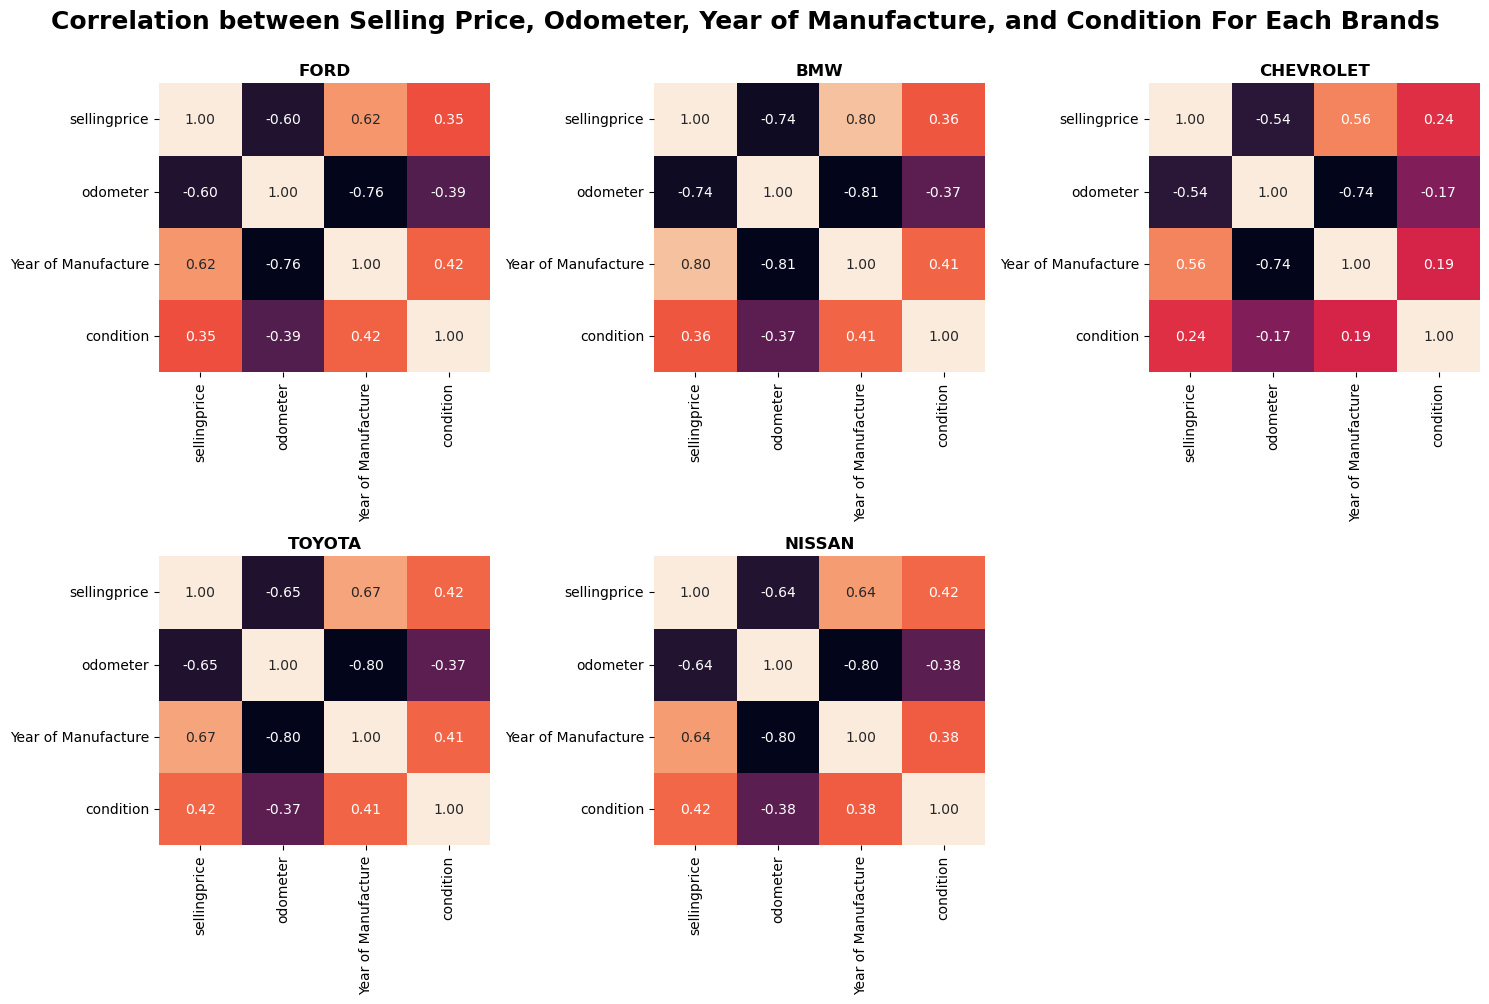

In [52]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.heatmap(ford_corr, annot=True, cbar=False, fmt = '.2f')
plt.title('FORD', fontweight = 'bold')

plt.subplot(2,3,2)
sns.heatmap(bmw_corr, annot=True, cbar=False, fmt = '.2f')
plt.title('BMW', fontweight = 'bold')

plt.subplot(2,3,3)
sns.heatmap(chevrolet_corr, annot=True, cbar=False, fmt = '.2f')
plt.title('CHEVROLET', fontweight = 'bold')

plt.subplot(2,3,4)
sns.heatmap(toyota_corr, annot=True, cbar=False, fmt = '.2f')
plt.title('TOYOTA', fontweight = 'bold')

plt.subplot(2,3,5)
sns.heatmap(nissan_corr, annot=True, cbar=False, fmt = '.2f')
plt.title('NISSAN', fontweight = 'bold')

plt.suptitle('Correlation between Selling Price, Odometer, Year of Manufacture, and Condition For Each Brands', fontsize=18, fontweight='bold', y=1)
plt.tight_layout()

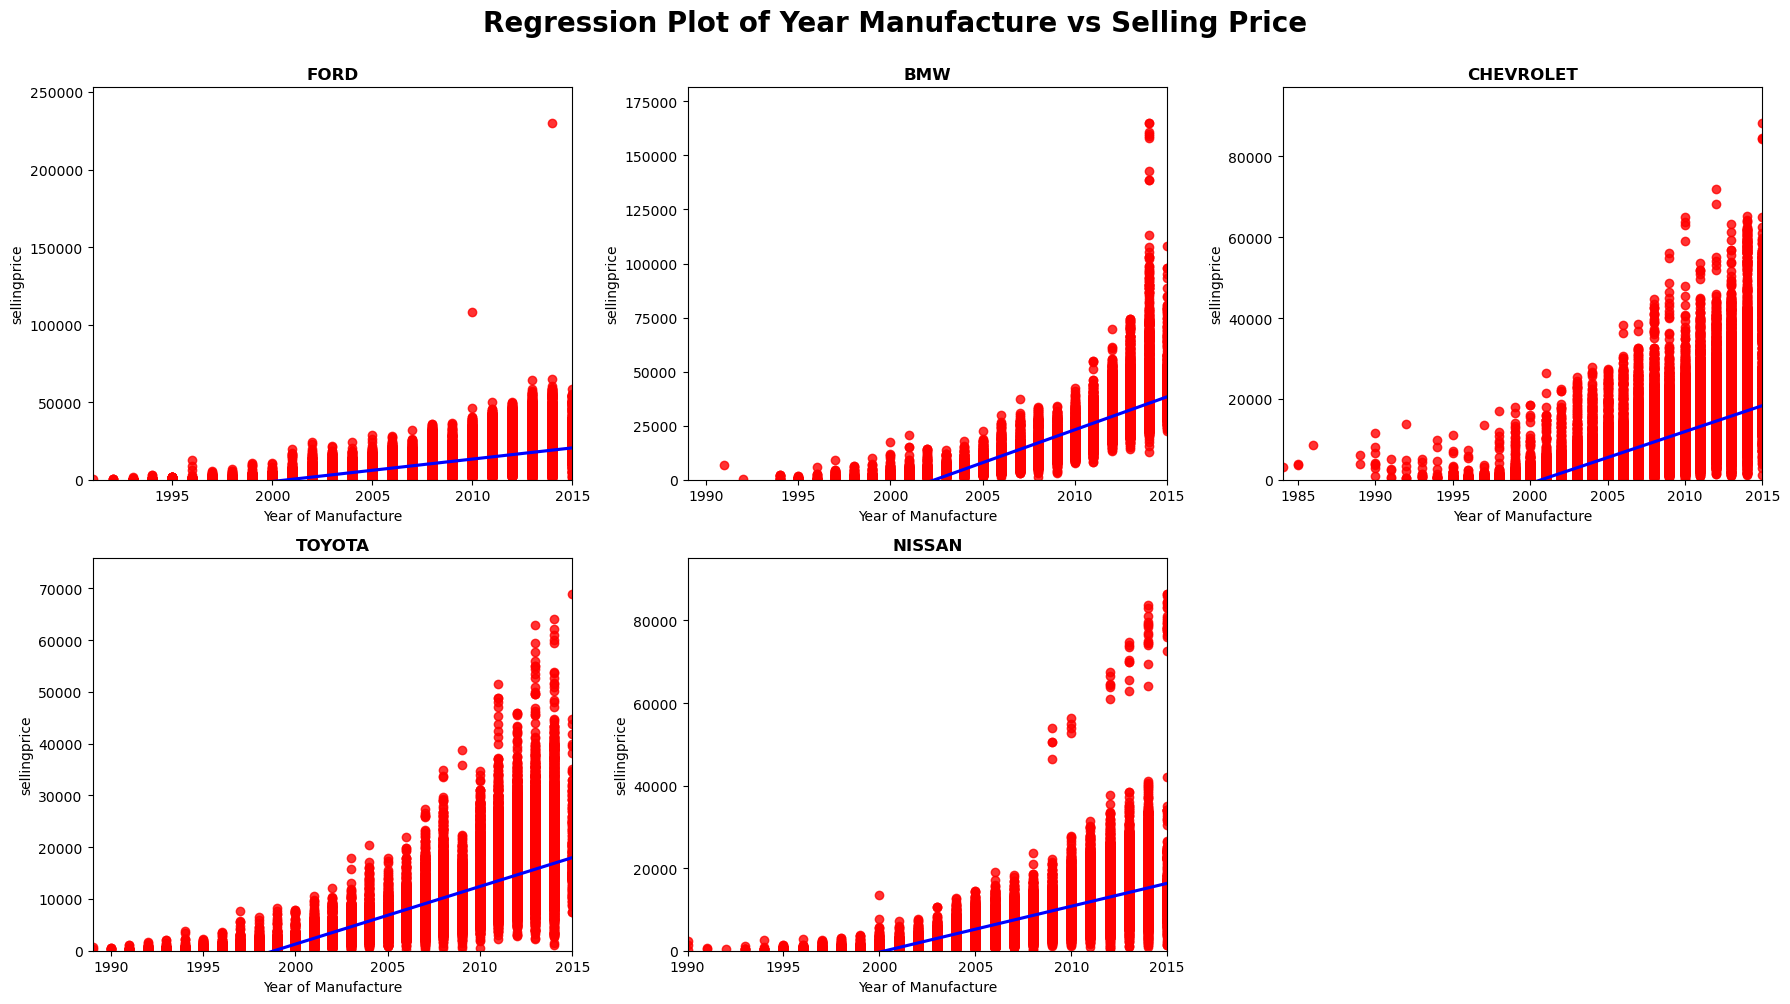

In [53]:
plt.figure(figsize=(18,10))

# Ford
plt.subplot(2,3,1)
sns.regplot(data=df_ford, x='Year of Manufacture', y='sellingprice', 
            scatter_kws={'color': 'red'}, line_kws={'color': 'blue'}, 
            truncate=True)
plt.xlim(1991, 2015)
plt.ylim(0, df_ford['sellingprice'].max() * 1.1)
plt.title('FORD', fontweight='bold')

# BMW
plt.subplot(2,3,2)
sns.regplot(data=df_bmw, x='Year of Manufacture', y='sellingprice', 
            scatter_kws={'color': 'red'}, line_kws={'color': 'blue'},
            truncate=True)
plt.xlim(1989, 2015)
plt.ylim(0, df_bmw['sellingprice'].max() * 1.1)
plt.title('BMW', fontweight='bold')

# Chevrolet
plt.subplot(2,3,3)
sns.regplot(data=df_chevrolet, x='Year of Manufacture', y='sellingprice', 
            scatter_kws={'color': 'red'}, line_kws={'color': 'blue'},
            truncate=True)
plt.xlim(1984, 2015)
plt.ylim(0, df_chevrolet['sellingprice'].max() * 1.1)
plt.title('CHEVROLET', fontweight='bold')

# Toyota
plt.subplot(2,3,4)
sns.regplot(data=df_toyota, x='Year of Manufacture', y='sellingprice', 
            scatter_kws={'color': 'red'}, line_kws={'color': 'blue'},
            truncate=True)
plt.xlim(1989, 2015)
plt.ylim(0, df_toyota['sellingprice'].max() * 1.1)
plt.title('TOYOTA', fontweight='bold')

# Nissan
plt.subplot(2,3,5)
sns.regplot(data=df_nissan, x='Year of Manufacture', y='sellingprice', 
            scatter_kws={'color': 'red'}, line_kws={'color': 'blue'},
            truncate=True)
plt.xlim(1990, 2015)
plt.ylim(0, df_nissan['sellingprice'].max() * 1.1)
plt.title('NISSAN', fontweight='bold')

plt.suptitle('Regression Plot of Year Manufacture vs Selling Price', 
             fontsize=20, fontweight='bold', y=1)
plt.tight_layout()

In [54]:
df_top_5_brand['Year of Manufacture'].unique()

array([2014, 2015, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1996, 1997, 1995, 1998, 1993,
       1989, 1992, 1994, 1990, 1991, 1985, 1984, 1986], dtype=int64)

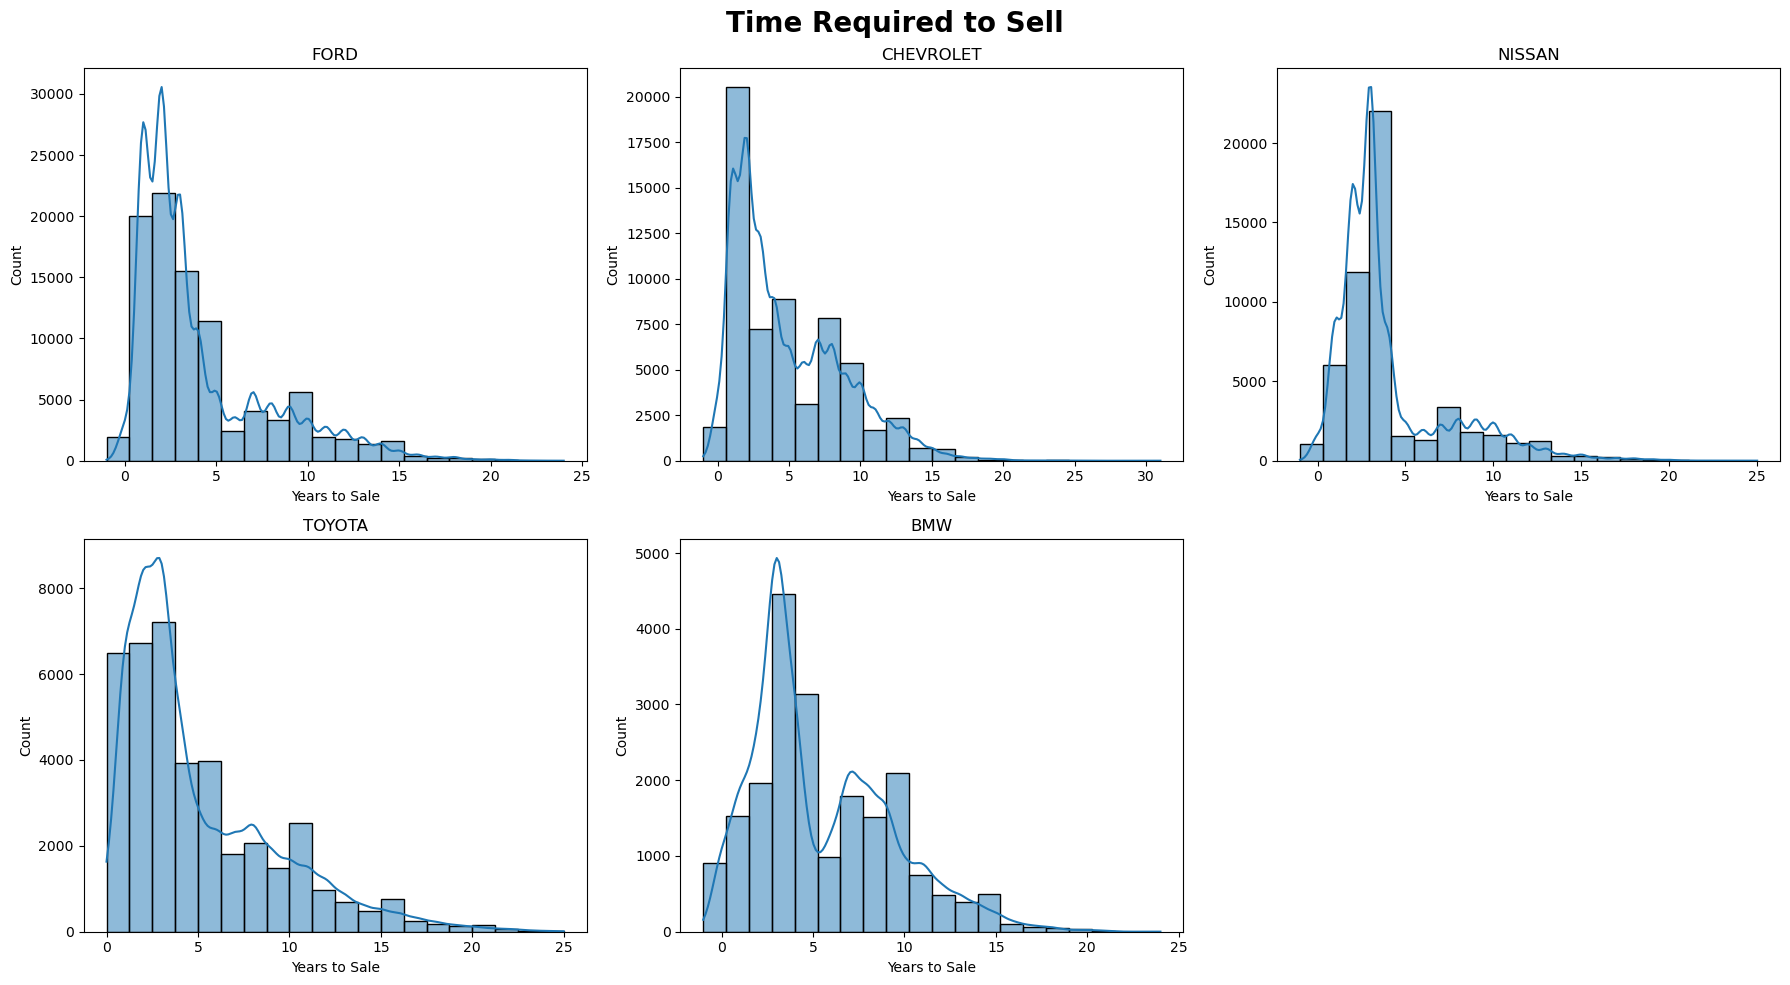

In [55]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.histplot(data=df_ford, x='Years to Sale', bins=20, kde=True)
plt.title('FORD')

plt.subplot(2,3,2)
sns.histplot(data=df_chevrolet, x='Years to Sale', bins=20, kde=True)
plt.title('CHEVROLET')

plt.subplot(2,3,3)
sns.histplot(data=df_nissan, x='Years to Sale', bins=20, kde=True)
plt.title('NISSAN')

plt.subplot(2,3,4)
sns.histplot(data=df_toyota, x='Years to Sale', bins=20, kde=True)
plt.title('TOYOTA')

plt.subplot(2,3,5)
sns.histplot(data=df_bmw, x='Years to Sale', bins=20, kde=True)
plt.title('BMW')

plt.suptitle('Time Required to Sell', fontsize = '20', fontweight = 'bold')

plt.tight_layout()
plt.show()

In [56]:
def top_5_models(df):

    '''This function is used to get the total sales and average sales of each brand model in the form of a DataFrame'''

    table_sum = df.groupby('model')['sellingprice'].sum().reset_index()
    table_sum = table_sum.sort_values('sellingprice', ascending=False).head()

    table_avg = df.groupby('model')['sellingprice'].mean().reset_index()
    table_avg = table_avg.sort_values('sellingprice', ascending=False).head()

    return table_sum, table_avg

total_sales_ford, avg_sales_ford = top_5_models(df_ford)
total_sales_bmw, avg_sales_bmw = top_5_models(df_bmw)
total_sales_toyota, avg_sales_toyota = top_5_models(df_toyota)
total_sales_nissan, avg_sales_nissan = top_5_models(df_nissan)
total_sales_chevrolet, avg_sales_chevrolet = top_5_models(df_chevrolet)

In [57]:
def market_share_1(df):

    table = df.groupby('model').agg(
        count_unit_model = ('model', 'count'),
        total_sales_per_model = ('sellingprice', 'sum')
    )

    total_units = df['model'].shape[0]
    total_sales = df['sellingprice'].sum()

    table['total unit'] = total_units
    table['total sales'] = total_sales
    table['market share per unit model (%)'] = ((table['count_unit_model'] / total_units) * 100).round(2)
    table['market share per sales model (%)'] = ((table['total_sales_per_model'] / total_sales) * 100).round(2)
    table['Average per model'] = (table['total_sales_per_model'] / table['count_unit_model']).round(2) 
    table = table.sort_values(by=['total_sales_per_model', 'count_unit_model', 'Average per model'], ascending=[False, False, False])
    
    column_order = [
        'count_unit_model', 
        'total unit', 
        'market share per unit model (%)',
        'total_sales_per_model', 
        'total sales', 
        'market share per sales model (%)',
        'Average per model'
    ]
    
    table = table[column_order].reset_index()

    return table

ms_ford = market_share_1(df_ford)
ms_chevrolet = market_share_1(df_chevrolet)
ms_nissan = market_share_1(df_nissan)
ms_toyota = market_share_1(df_toyota)
ms_bmw = market_share_1(df_bmw)
        

In [58]:
def create_overview_chart(total_sales, avg_sales, ms, brand):

    '''Create a horizontal bar chart to visualize Total Sales, Average Sales, Market Share by Unit Model, and Market Share by Total Sales of the Model'''
    plt.figure(figsize=(12, 6))
    sns.barplot(data=total_sales, 
            x='sellingprice', 
            y='model', 
            palette= colors, 
            hue = 'model')

    plt.xlabel("Total Sales Price", fontsize=12)
    plt.ylabel(f"{brand} Model", fontsize=12)
    plt.title(f"Total Sales per Model {brand}", fontsize=14, fontweight='bold')

    plt.yticks(fontsize=10, ha='right')
    plt.xticks(fontsize=10)

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_sales, 
            x='sellingprice', 
            y='model', 
            palette= colors, 
            hue = 'model')

    plt.xlabel("Average Sales Price", fontsize=12)
    plt.ylabel(f"{brand} Model", fontsize=12)
    plt.title(f"Total Average per Model {brand}", fontsize=14, fontweight='bold')

    plt.yticks(fontsize=10, ha='right')
    plt.xticks(fontsize=10)

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.barplot(data=ms.head(), 
            x='market share per unit model (%)', 
            y='model', 
            palette= colors, 
            hue = 'model')
    
    plt.xlabel("Market Share ", fontsize=12)
    plt.ylabel(f"{brand} Model", fontsize=12)
    plt.title("Market Share per Unit Model (%)", fontsize=14, fontweight='bold')

    plt.yticks(fontsize=10, ha='right')
    plt.xticks(fontsize=10)

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.barplot(data=ms.head(), 
            x='market share per sales model (%)', 
            y='model', 
            palette= colors, 
            hue = 'model')

    plt.xlabel("Market Share ", fontsize=12)
    plt.ylabel(f"{brand} Model", fontsize=12)
    plt.title("Market Share per Sales Model (%)", fontsize=14, fontweight='bold')

    plt.yticks(fontsize=10, ha='right')
    plt.xticks(fontsize=10)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## BMW OVERVIEW SALES

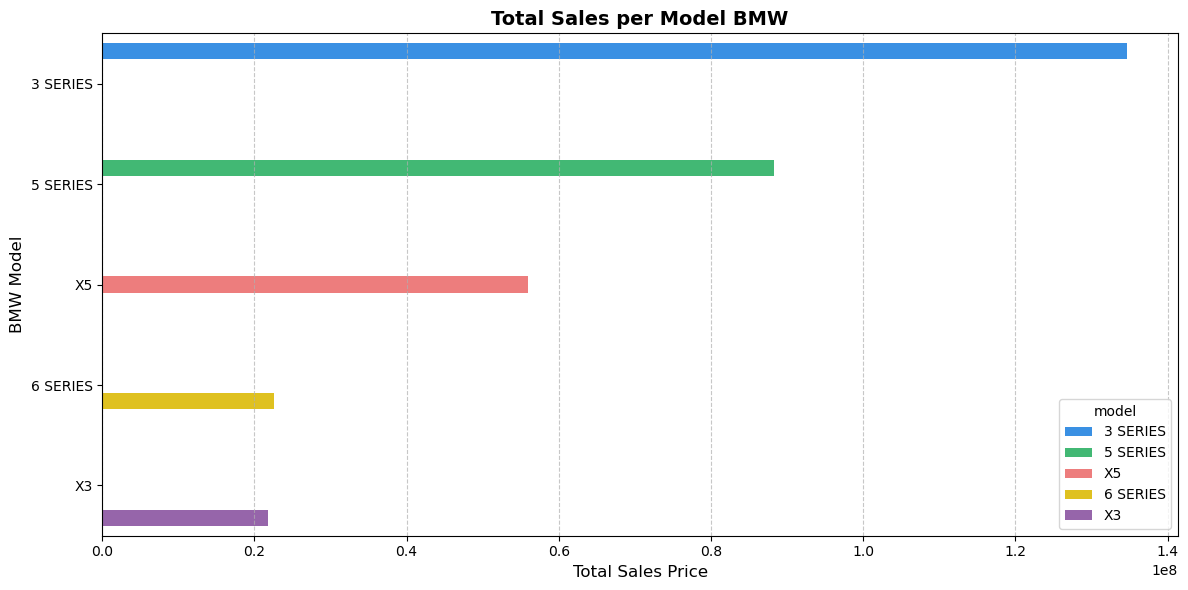

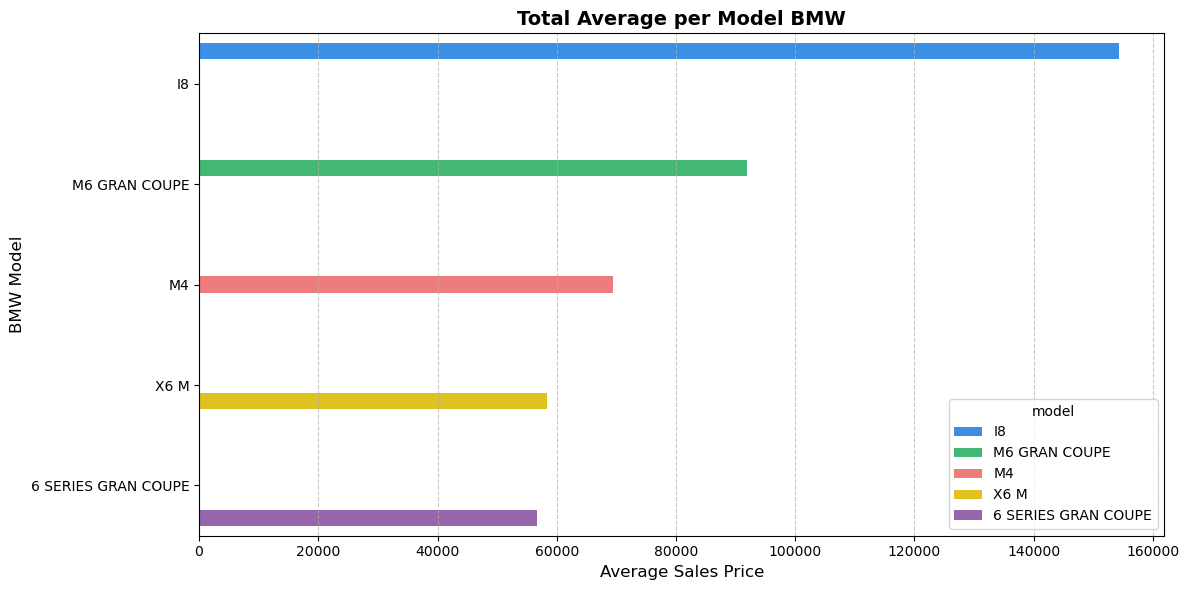

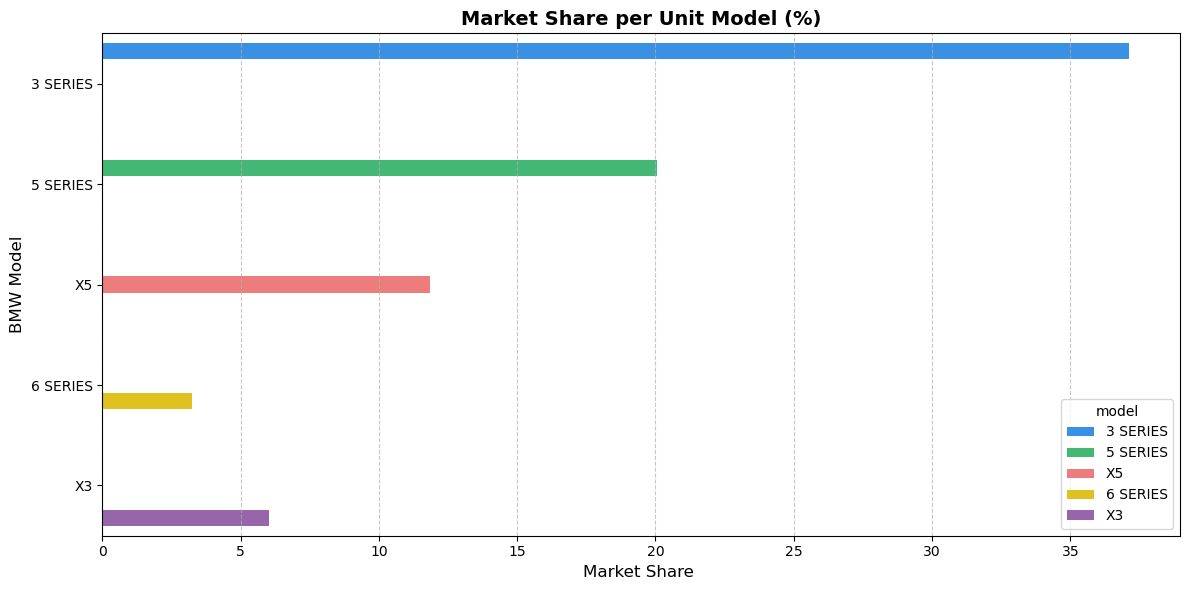

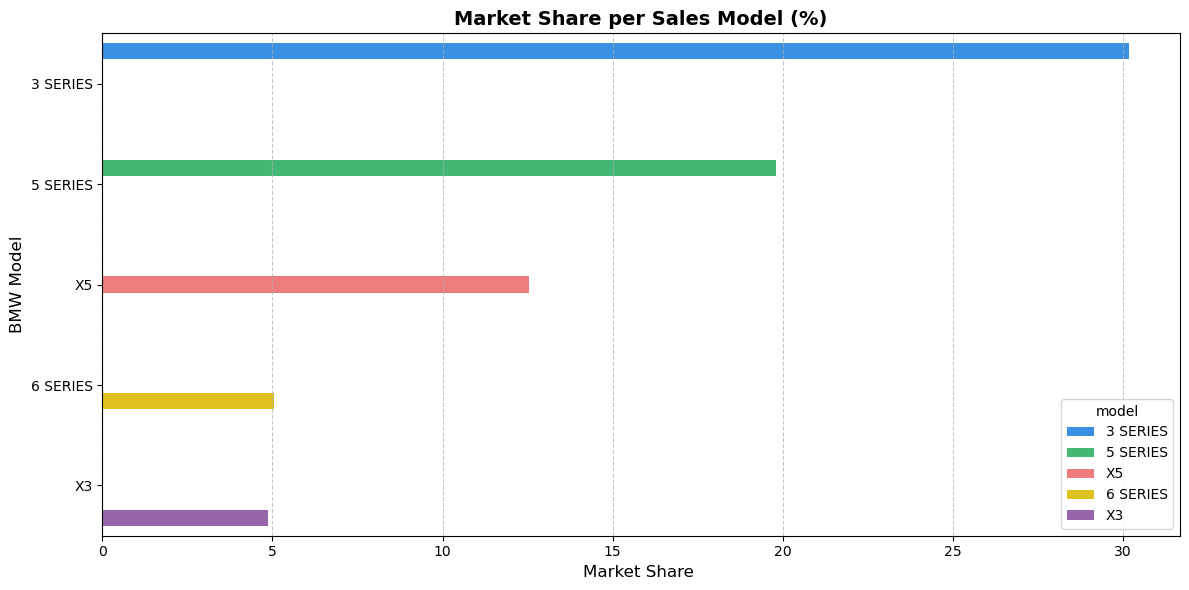

In [59]:
create_overview_chart(total_sales_bmw, avg_sales_bmw, ms_bmw, 'BMW')

## FORD OVERVIEW SALES

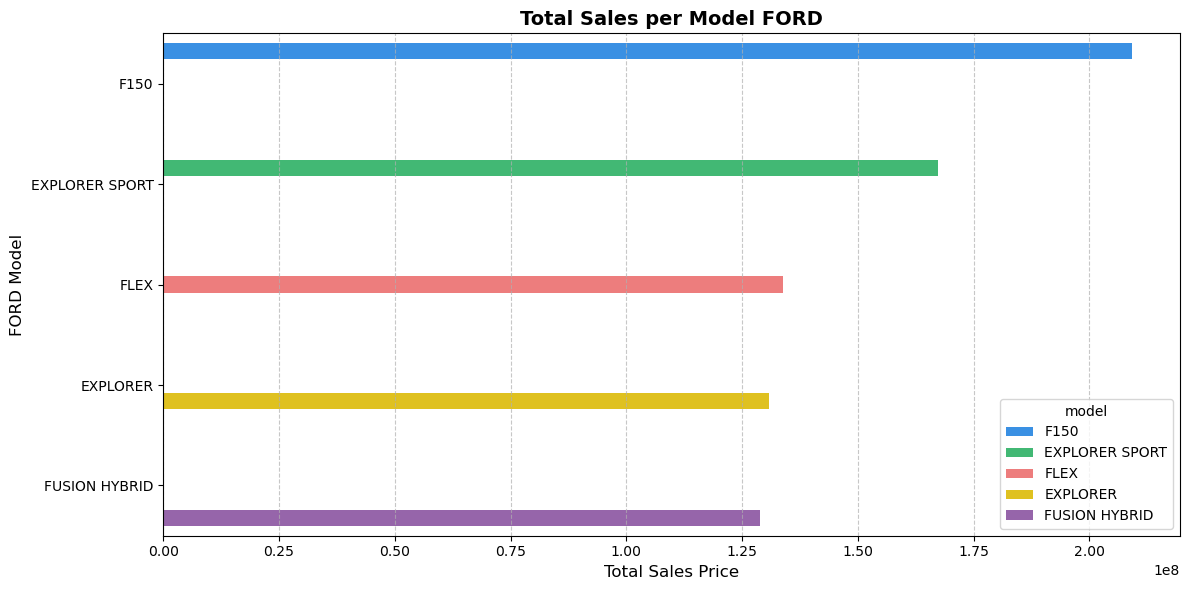

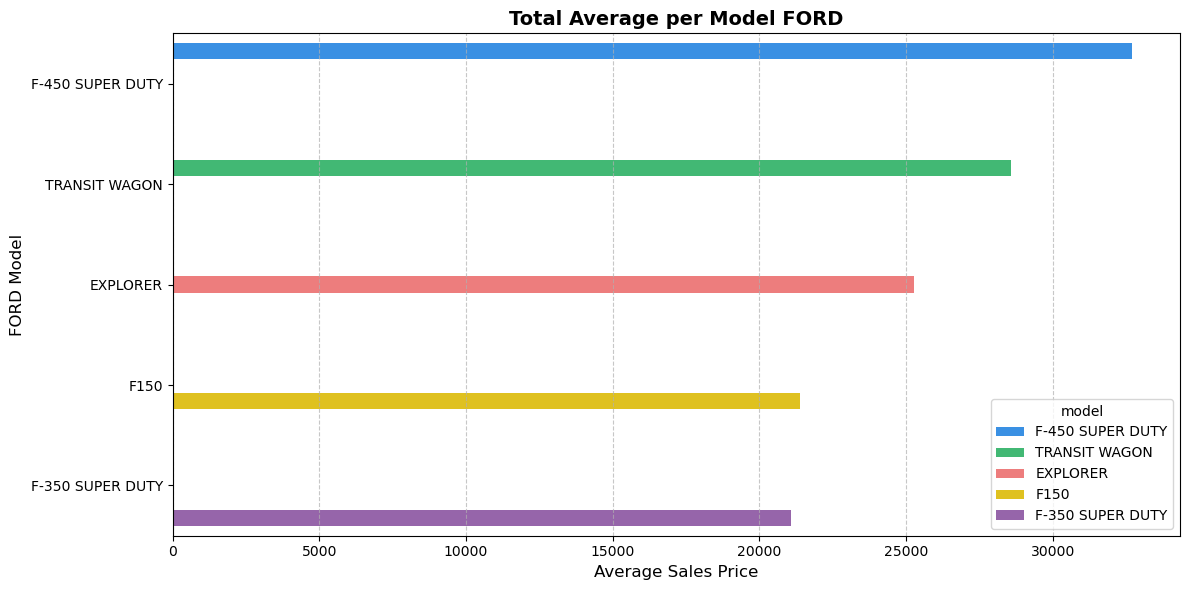

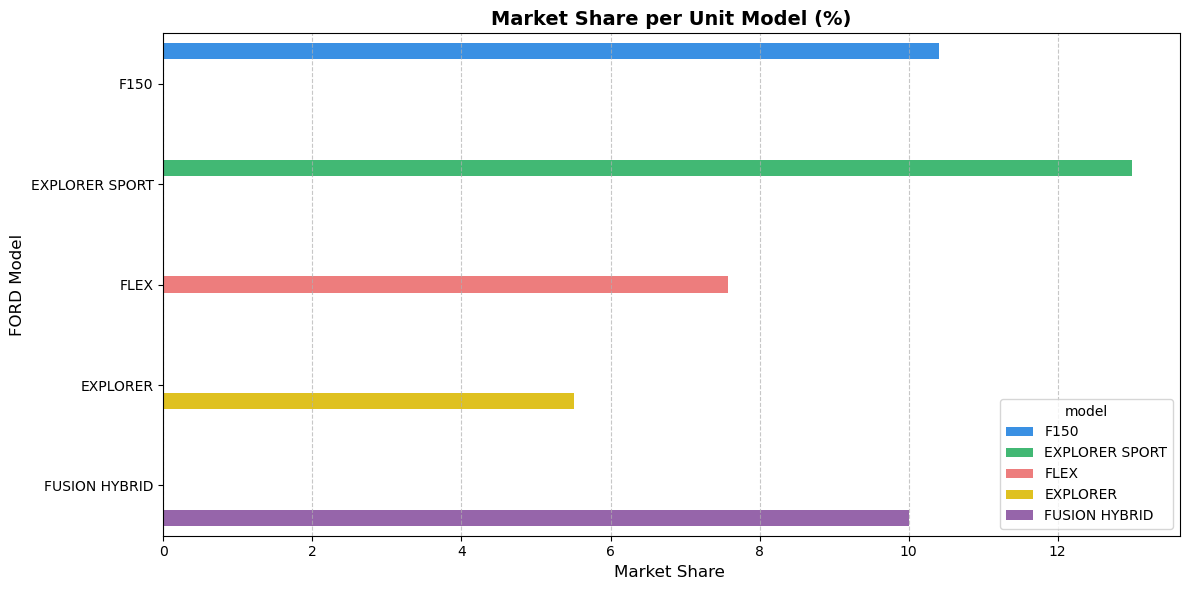

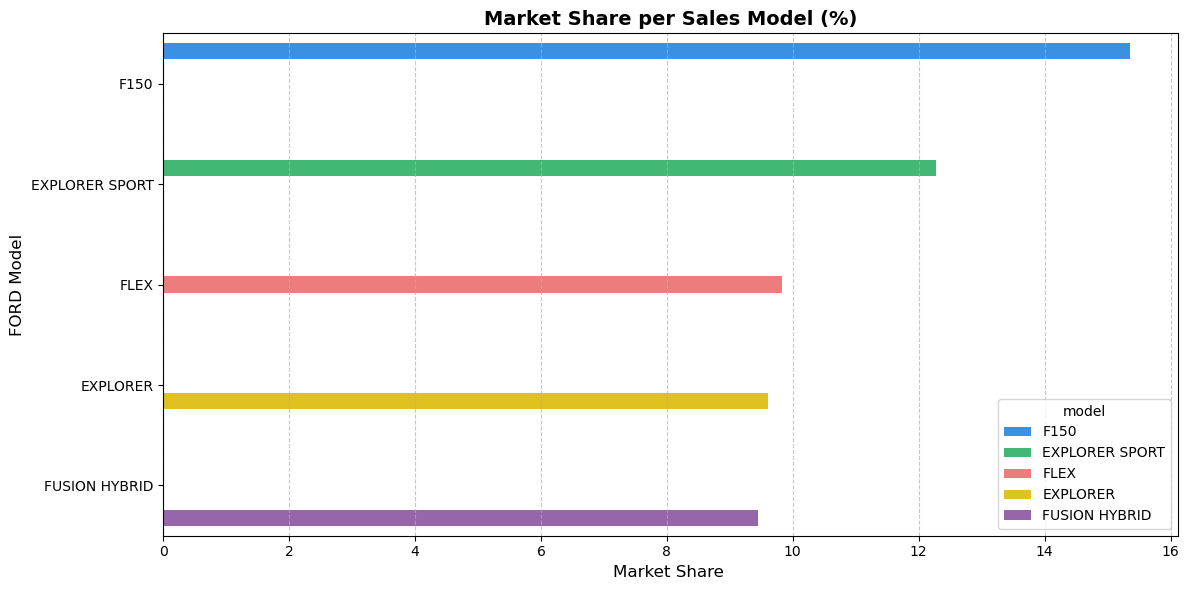

In [60]:
create_overview_chart(total_sales_ford, avg_sales_ford, ms_ford, 'FORD')

## CHEVROLET OVERVIEW SALES

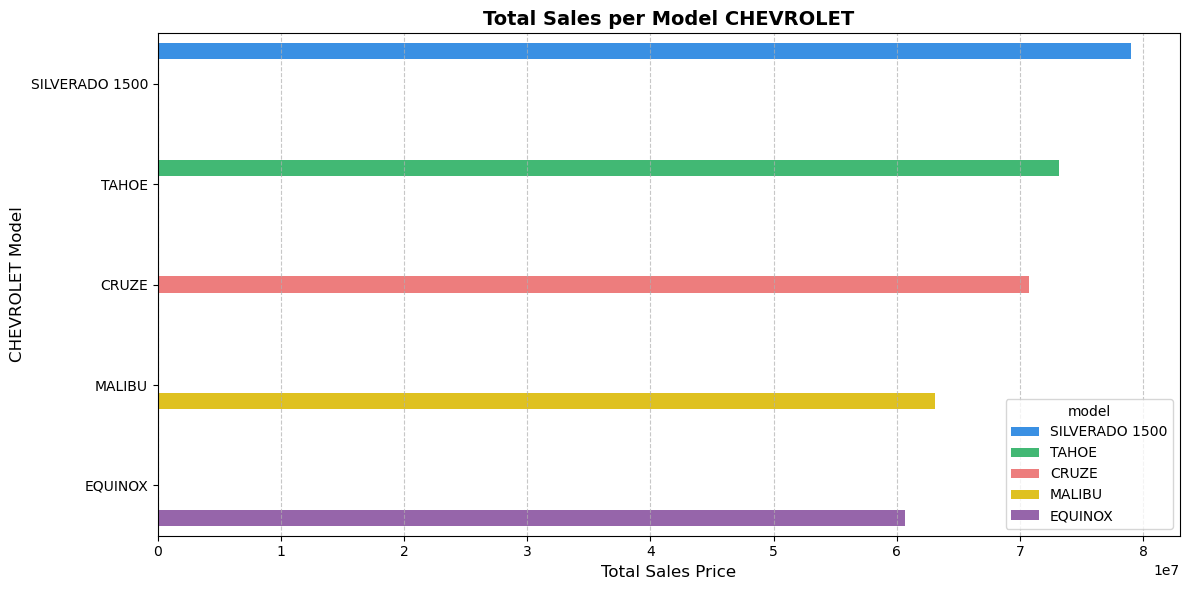

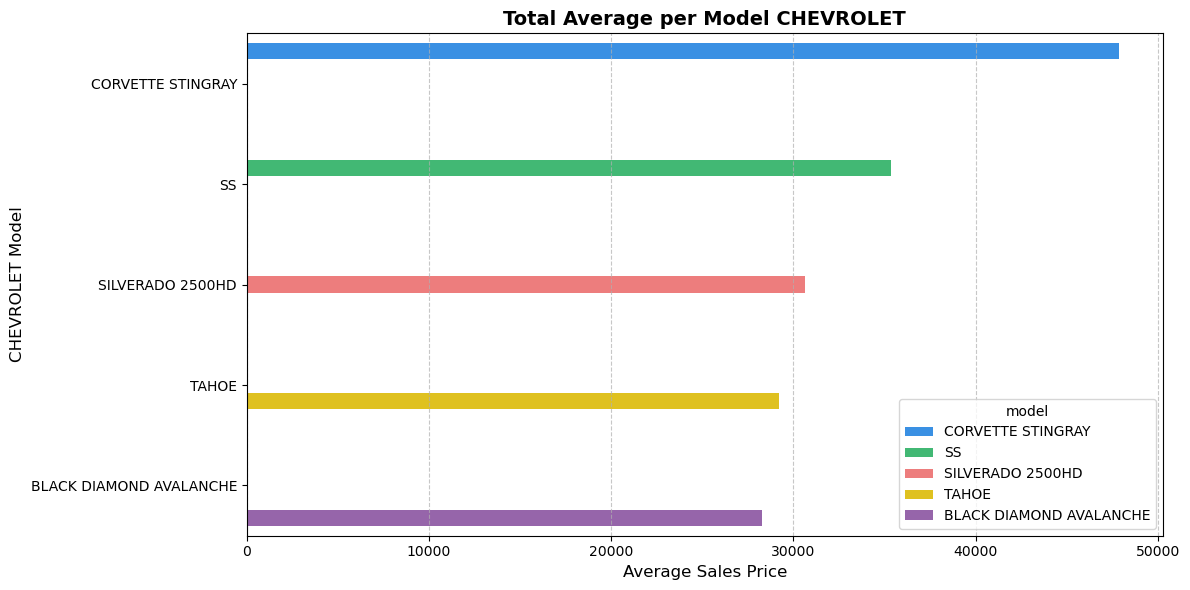

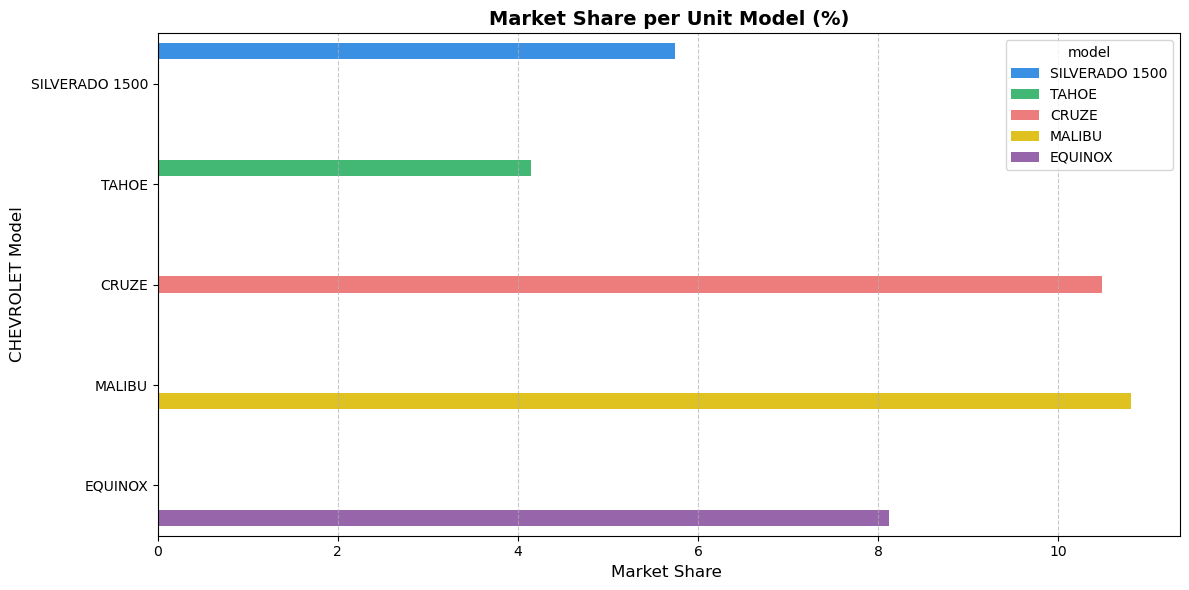

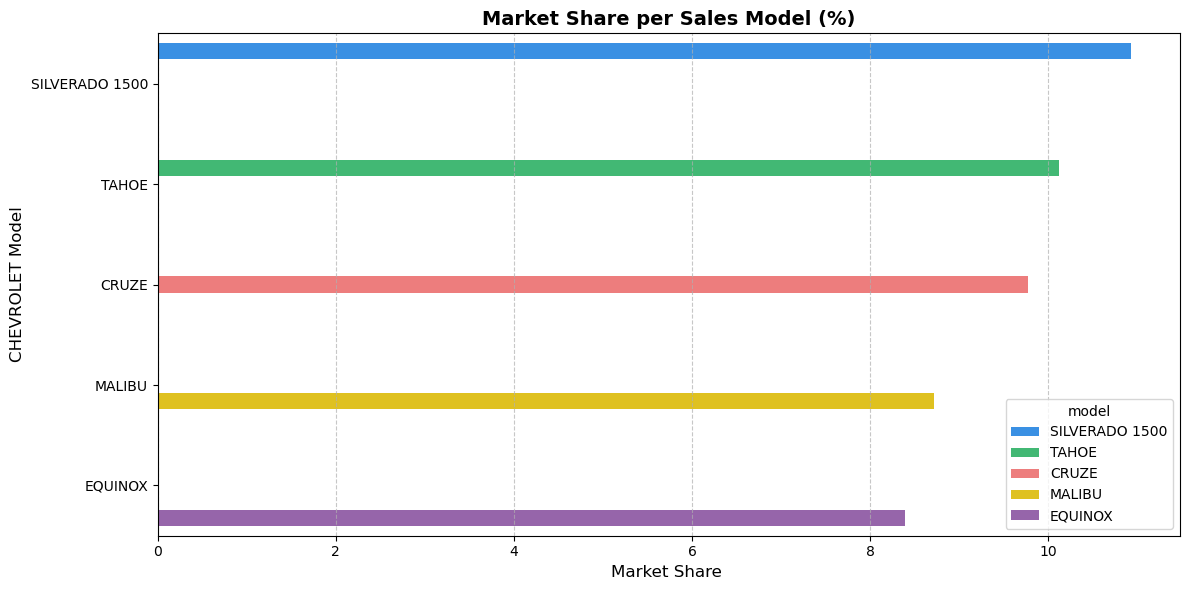

In [61]:
create_overview_chart(total_sales_chevrolet, avg_sales_chevrolet, ms_chevrolet, 'CHEVROLET')

## NISSAN OVERVIEW SALES

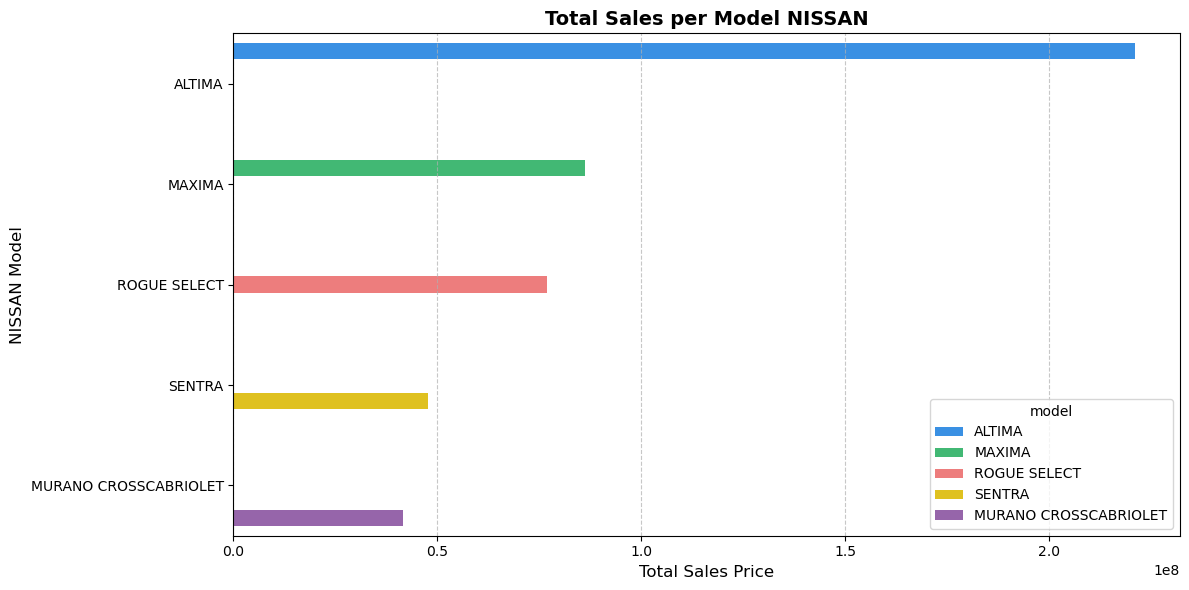

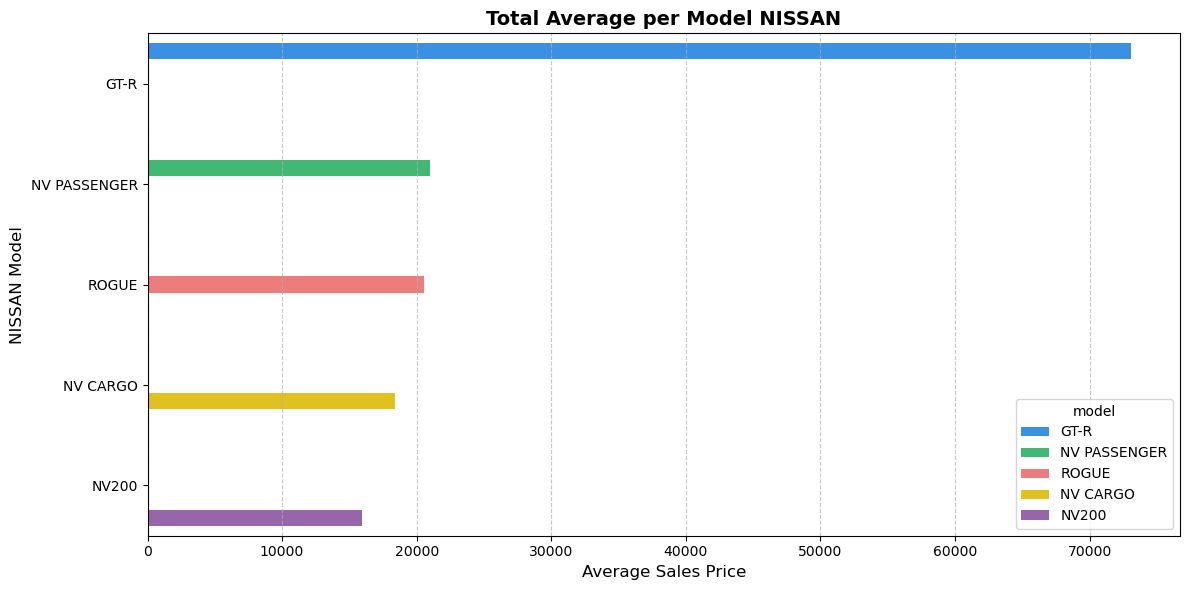

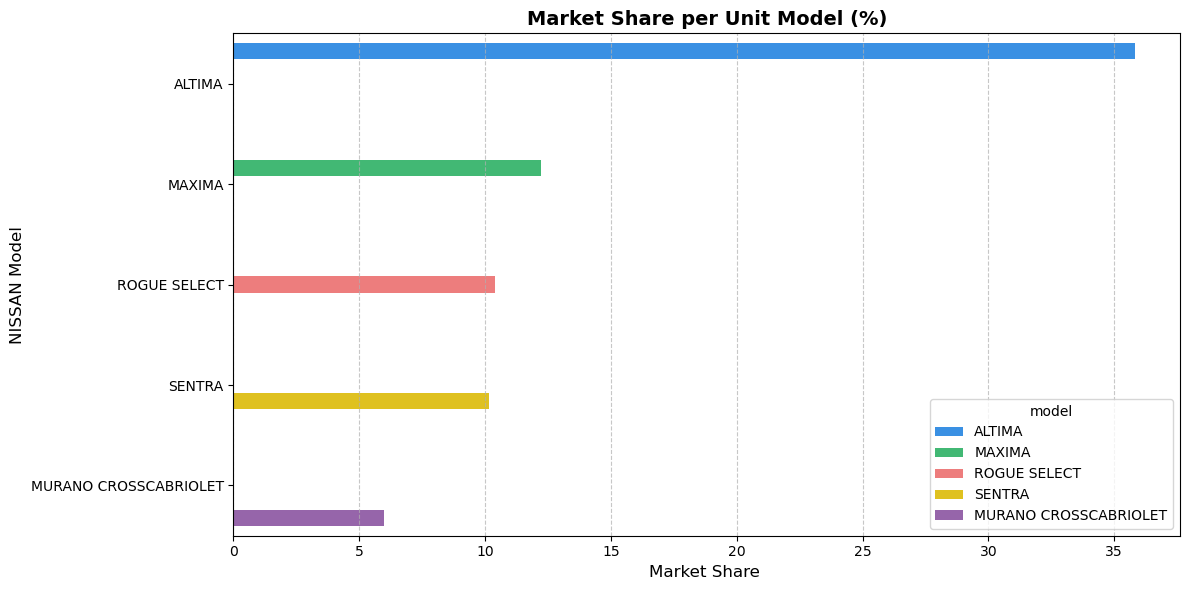

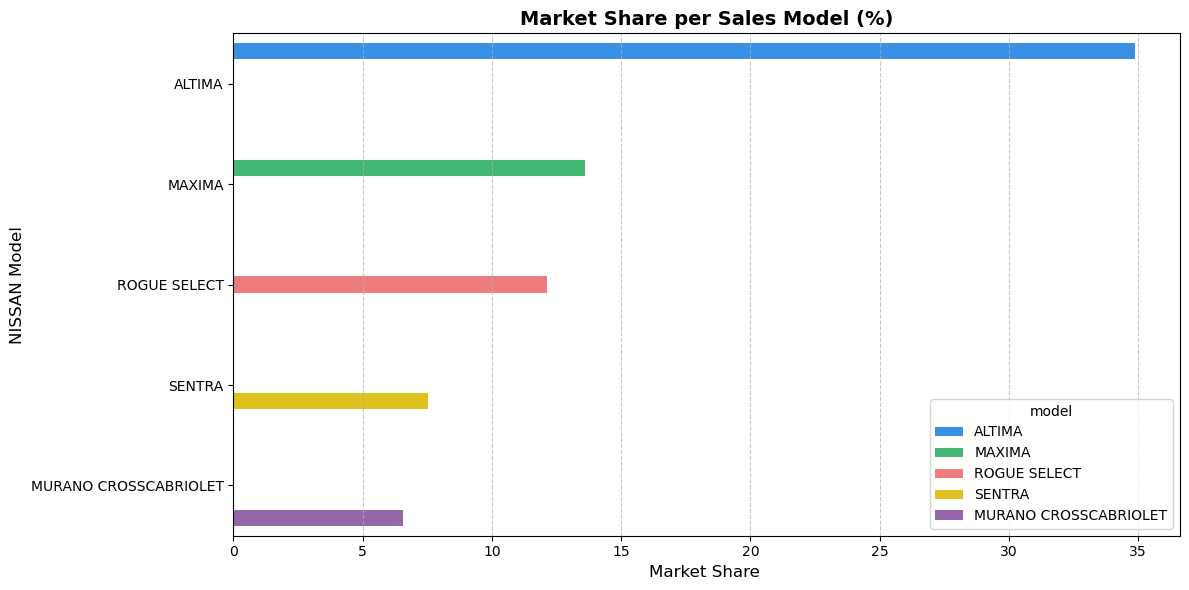

In [62]:
create_overview_chart(total_sales_nissan, avg_sales_nissan, ms_nissan, 'NISSAN')

## TOYOTA OVERVIEW SALES

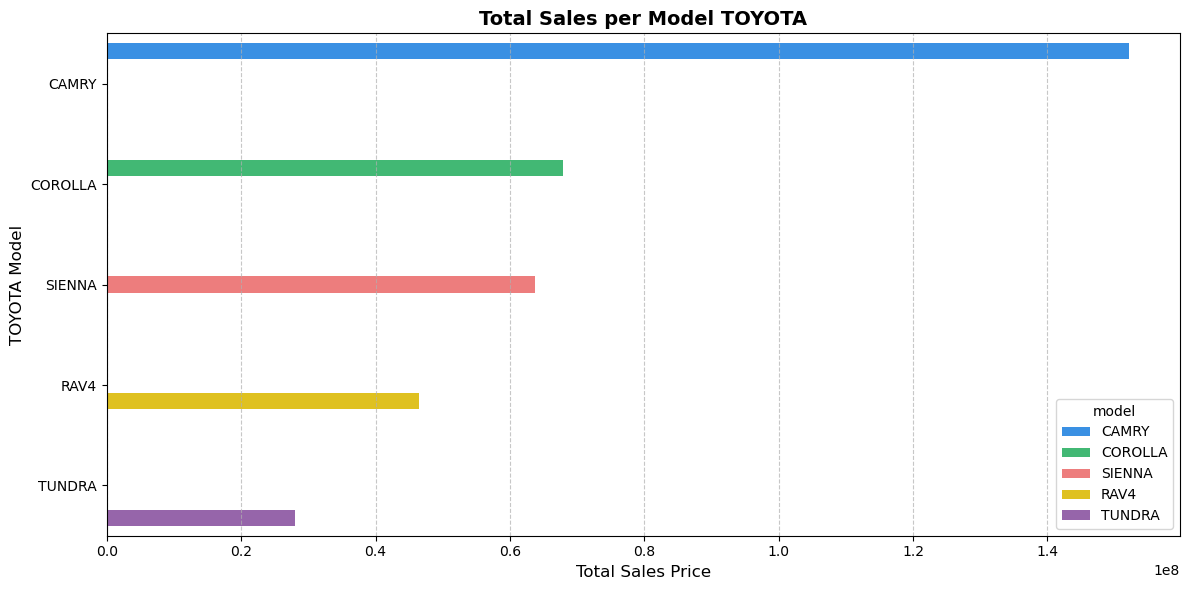

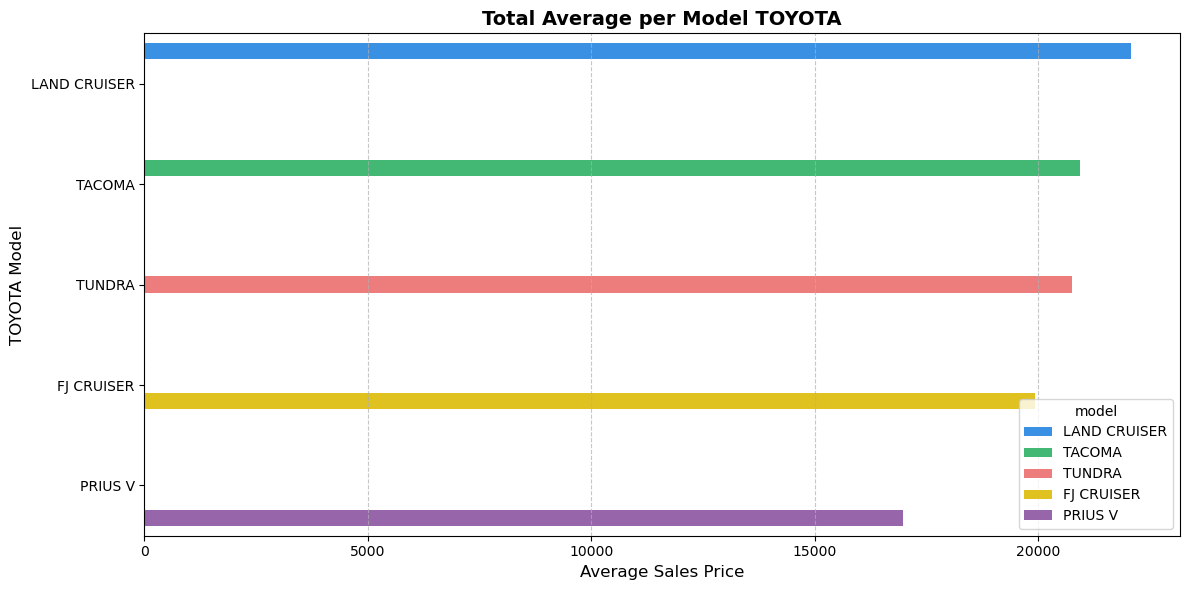

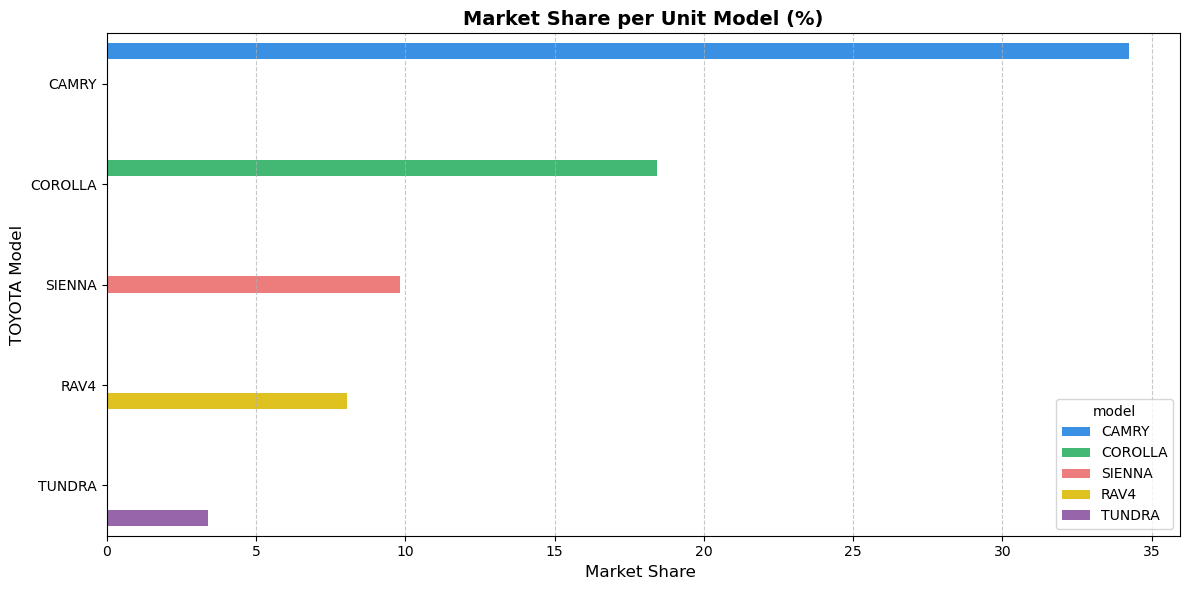

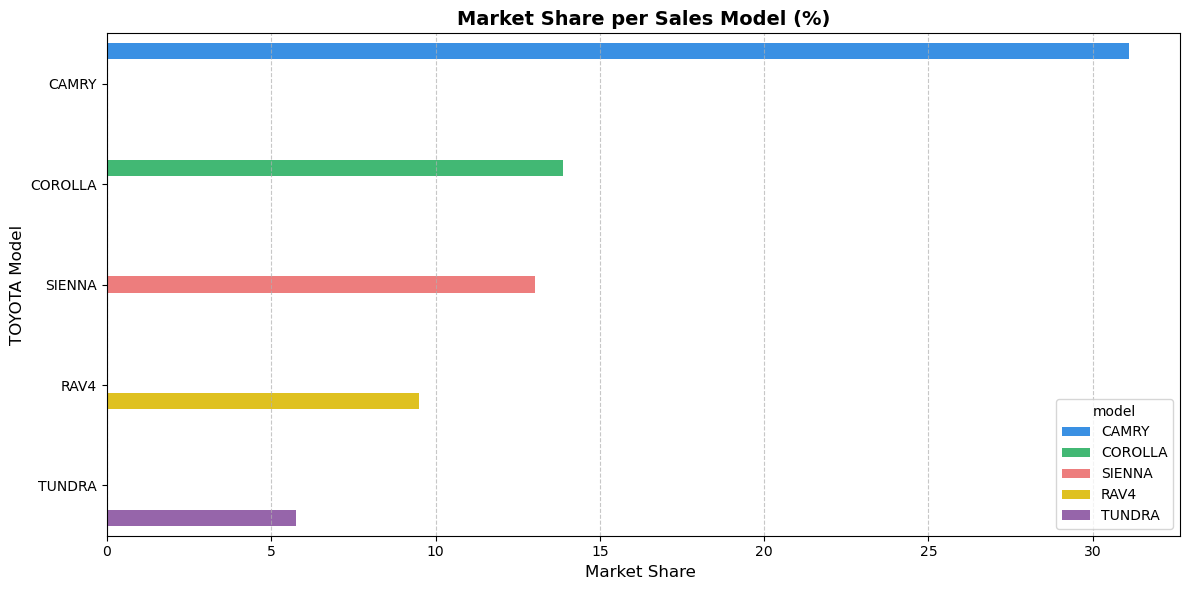

In [63]:
create_overview_chart(total_sales_toyota, avg_sales_toyota, ms_toyota, 'TOYOTA')